In [1]:
import glob
import numpy             as np
import pandas            as pd
import tables            as tb
import matplotlib.pyplot as plt

from histogram_functions import *

from invisible_cities.io.pmaps_io import load_pmaps_as_df

to_df = pd.DataFrame.from_records

In [2]:
datadir = "/home/gdiaz/DATA/pmaps_summaries/"
run    = 7374
trigger = "trigger1"

icversion_file  = tb.open_file( datadir + f"/pmaps_summary_{run}_{trigger}_icversion.h5"   , "r")

## DATA

In [3]:
## number of events
nev_icversion  = icversion_file .root.N_events.Nevents.read()

## S1 data
S1_icversion  = to_df ( icversion_file .root.S1.S1.read() ) 

## S2 data
S2_icversion  = to_df ( icversion_file .root.S2.S2.read() )

## TP Slide data
Sld_icversion  = to_df ( icversion_file .root.Slide.Sld.read() )

## event number-file number
event_file = np.unique( icversion_file.root.S2.S2.read()[["event", "file"]] )

## Number of events

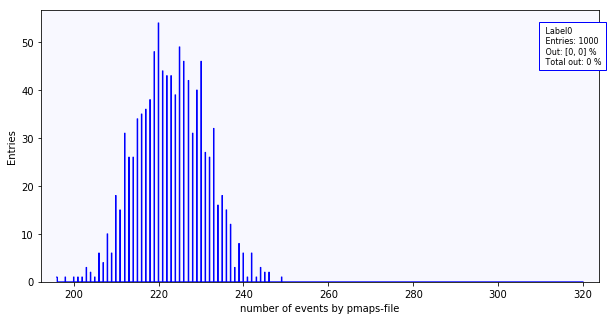

In [4]:
key = "n_events"
histo1D(nev_icversion [key],
        xlabel = "number of events by pmaps-file",
        bins= 1000,
        xlims=[None, 320],
        scale = "linear")

## S1

In [5]:
S1_events_icversion = np.unique(S1_icversion["event"] )
S2_events_icversion = np.unique(S2_icversion["event"] )
events_without_S1_icversion = np.setdiff1d(S2_events_icversion, S1_events_icversion)

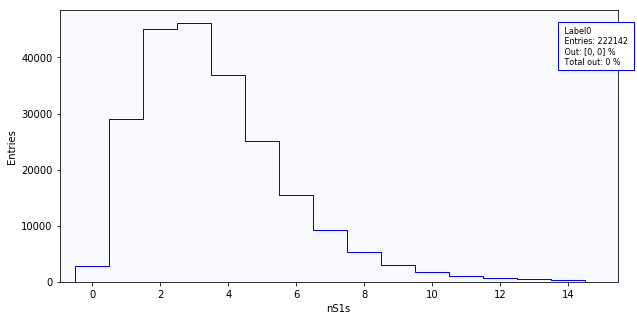

In [7]:
_, nS1s_icversion  = np.unique(S1_icversion ["event"], return_counts=True)
nS1s_icversion = np.concatenate((nS1s_icversion, np.zeros(len(events_without_S1_icversion))))

key = "nS1s"
histo1D(nS1s_icversion,
        xlabel = key,
        bins=np.arange(-0.5, 15),
        xlims=[-0.5, 15],
        scale = "linear")

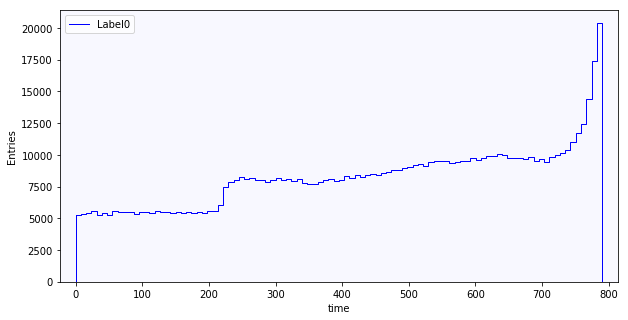

In [8]:
key = "time"
histo1D(S1_icversion [key].values,
        xlabel = key,
        bins=100,
        Bbox=False)

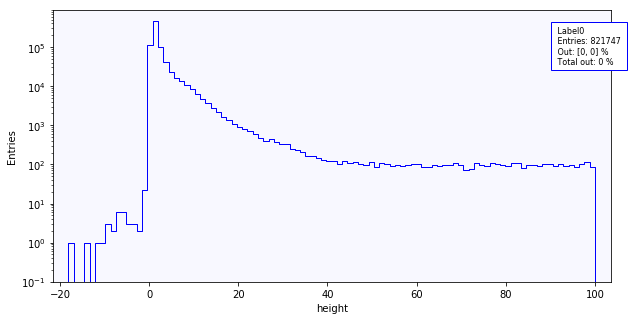

In [9]:
key = "height"
histo1D(S1_icversion [key].values,
        xlabel = key,
        bins=100, 
        xlims=[None, 100],
        scale = "log")

In [10]:
neg_height = S1_icversion[S1_icversion["height"]<0]["event"].values

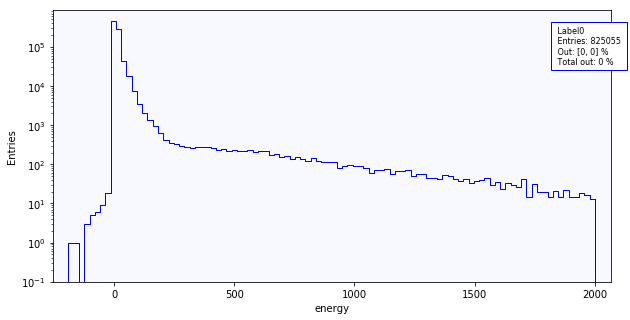

In [11]:
key = "energy"
histo1D(S1_icversion [key].values,
        xlabel = key,
        bins=100, 
        xlims=[None, 2e3],
        scale = "log")

In [12]:
neg_energy = S1_icversion[S1_icversion["energy"]<0]["event"].values

print( np.isin(neg_height, neg_energy).all() )
len(neg_energy) / len( S1_icversion["event"].values )*100

True


0.022767236493458052

In [13]:
np.unique( neg_energy, return_counts=True);

In [14]:
sel = np.isin( event_file["event"], neg_energy)

event_file_selection = event_file[sel]

to_df(event_file_selection);

In [15]:
nS1s=[]
for event in event_file_selection["event"]:
    nS1s.append(len(S1_icversion[S1_icversion["event"]==event]))
nS1s;

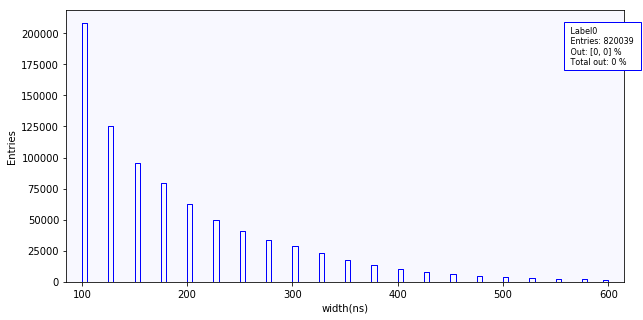

In [16]:
key = "width"
histo1D(S1_icversion [key].values,
        xlabel = key + "(ns)",
        bins=100, 
        xlims=[None, 6e2],
        scale = "linear")

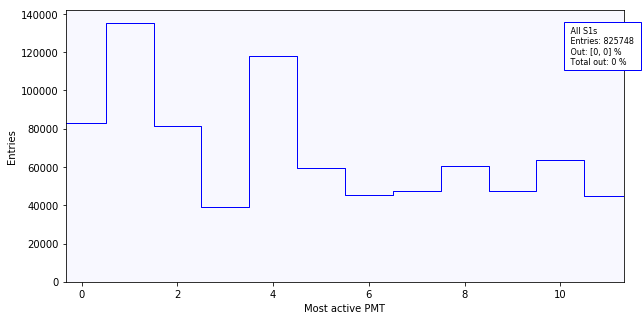

In [18]:
key = "most_active_PMT"
histo1D(S1_icversion [key].values,
        xlabel = "Most active PMT",
        Label0="All S1s",
        bins=np.arange(-0.5, 12.5), 
        xlims=[None, None],
        scale = "linear")

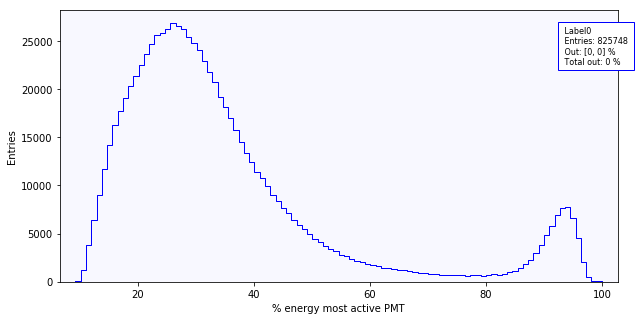

In [19]:
key = "energy_fraction_most_active_PMT"
histo1D(S1_icversion [key].values,
        xlabel = "% energy most active PMT",
        bins=100, 
        xlims=[None, None],
        scale = "linear")

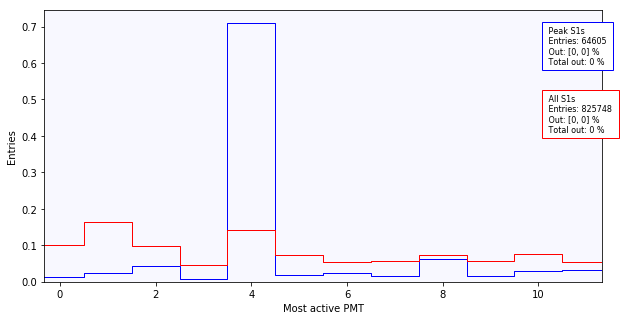

In [22]:
histo1D( S1_icversion  [S1_icversion[key]>80] ["most_active_PMT"],
         S1_icversion  ["most_active_PMT"],
         Label0 = "Peak S1s",
         Label1 = "All S1s",
         bins=np.arange(-0.5, 12.5),
         xlabel = "Most active PMT",
         xlims=[None, None],
         scale = "linear",
         normalize=True)

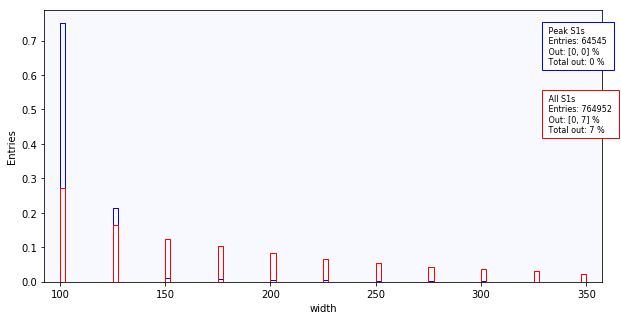

In [26]:
histo1D( S1_icversion  [S1_icversion[key]>80] ["width"],
         S1_icversion  ["width"],
         bins=100,
         xlabel = "width",
         Label0 = "Peak S1s",
         Label1 = "All S1s",
         xlims=[None, 350],
         scale = "linear",
         normalize=True)

In [28]:
evts = np.unique( S1_icversion  [S1_icversion["energy_fraction_most_active_PMT"]>80]["event"].values)

S1_selection = S1_icversion[ np.isin( S1_icversion["event"], evts) ]
without_S1_selection = events_without_S1_icversion[np.isin(events_without_S1_icversion, evts)]

_, nS1s = np.unique(S1_selection ["event"], return_counts=True)
nS1s = np.concatenate((nS1s, np.zeros(len(without_S1_selection))))

len(evts)/ len(np.unique( S1_icversion))*100

1.8096060015093438

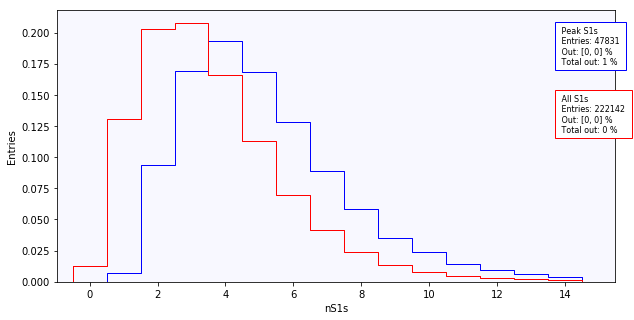

In [29]:
histo1D(nS1s,
        nS1s_icversion,
        bins=np.arange(-0.5, 15),
        xlims=[-0.5, 15],
        Label0 = "Peak S1s",
        Label1 = "All S1s",
        xlabel="nS1s",
        scale = "linear",
        normalize=True)

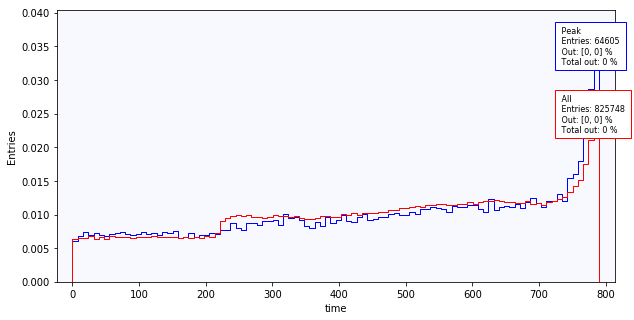

In [34]:
histo1D(S1_icversion  [S1_icversion["energy_fraction_most_active_PMT"]>80]["time"],
        S1_icversion["time"],
        bins=100,
        xlabel="time",
        Label0="Peak",
        Label1="All",
        scale = "linear",
        normalize=True)

## S2

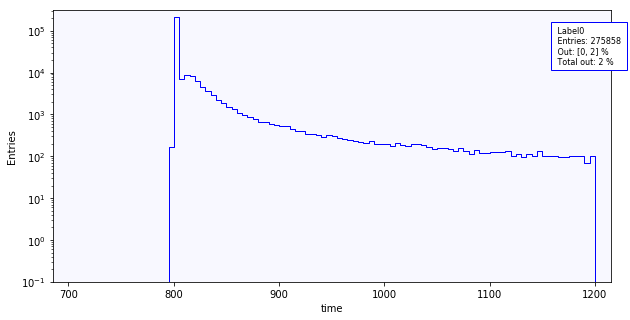

In [37]:
key = "time"
histo1D(S2_icversion [key].values,
        xlabel = key,
        bins=100,
        xlims = [700, 1200],
        scale="log")

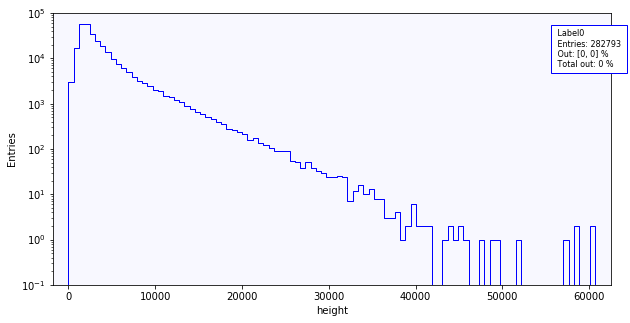

In [38]:
key = "height"
histo1D(S2_icversion [key].values,
        xlabel = key,
        bins=100, 
        xlims=[None, None],
        scale = "log")

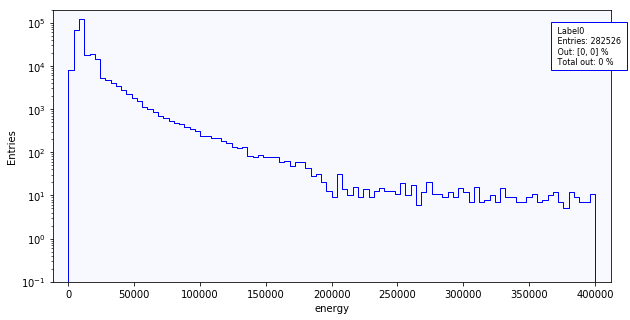

In [39]:
key = "energy"
histo1D(S2_icversion [key].values,
        xlabel = key,
        bins=100, 
        xlims=[None, 4e5],
        scale = "log")

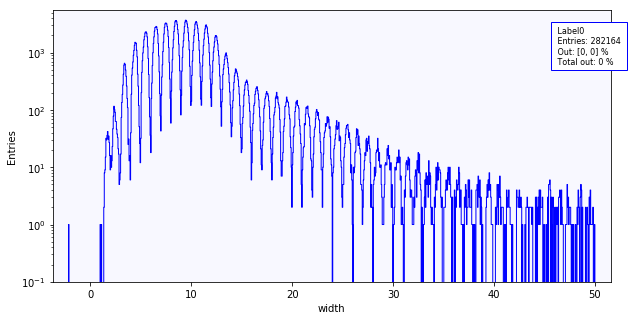

In [40]:
key = "width"
histo1D(S2_icversion [key].values*10**-3,
        xlabel = key,
        bins=1000, 
        xlims=[None, 50],
        scale = "log")

In [42]:
np.mean(S2_icversion [key].values)

9829.452933771345

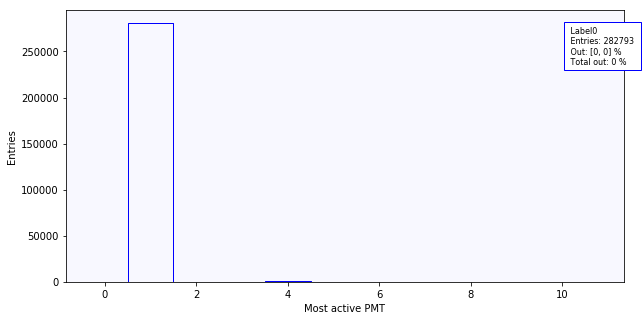

In [43]:
key = "most_active_PMT"
histo1D(S2_icversion [key].values,
        xlabel = "Most active PMT",
        bins=np.arange(-0.5, 12.5), 
        xlims=[-0.5, None],
        scale = "linear")

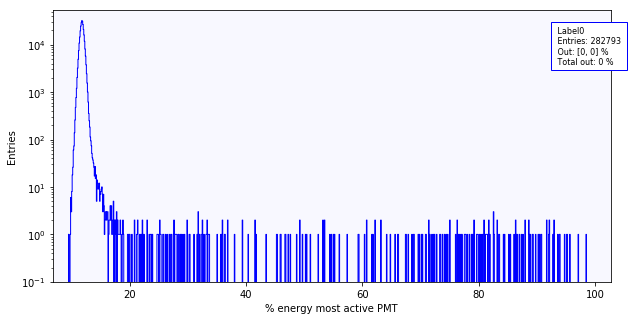

In [44]:
key = "energy_fraction_most_active_PMT"
histo1D(S2_icversion [key].values,
        xlabel = "% energy most active PMT",
        bins=1000, 
        xlims=[None, 100],
        scale = "log")

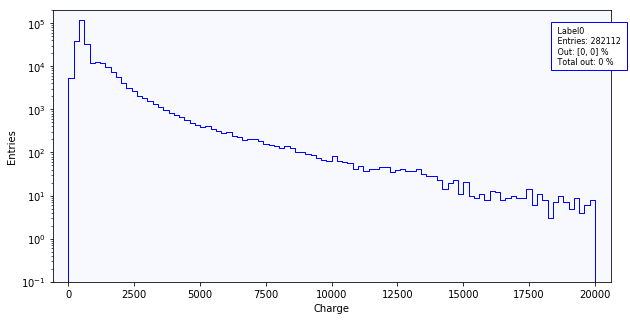

In [45]:
key = "charge"
histo1D(S2_icversion [key].values,
        xlabel = "Charge",
        bins=100, 
        xlims=[None, 2e4],
        scale = "log")

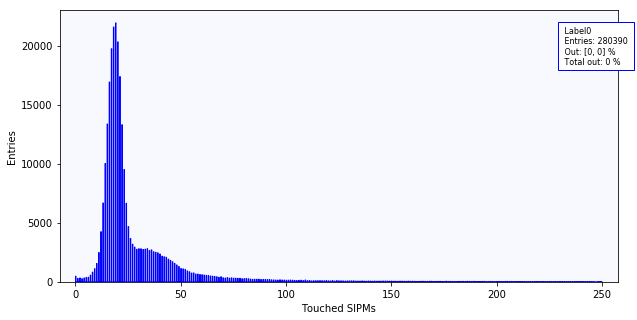

In [46]:
key = "touched_sipms"
histo1D(S2_icversion [key].values,
        xlabel = "Touched SIPMs",
        bins=1000, 
        xlims=[None, 250],
        scale = "linear")

# Slide

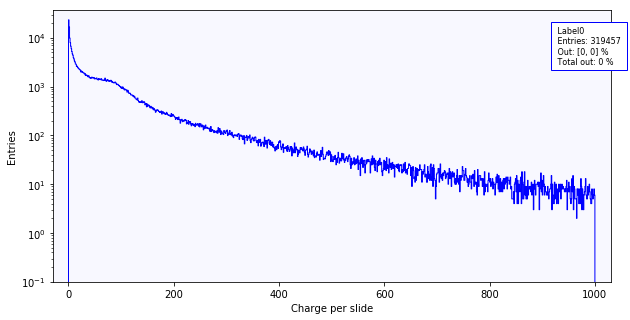

In [47]:
key = "charge"
histo1D(Sld_icversion [key].values,
        xlabel = "Charge per slide",
        bins=1000, 
        xlims=[None, 1e3],
        scale = "log")

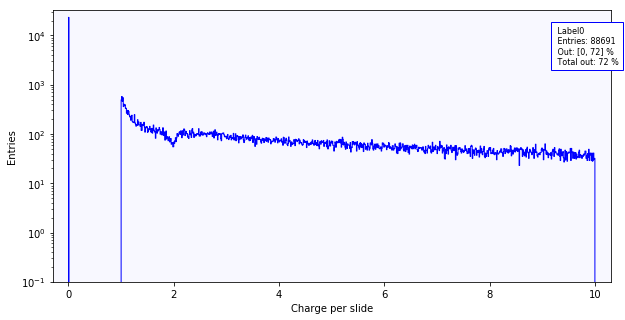

In [48]:
key = "charge"
histo1D(Sld_icversion [key].values,
        xlabel = "Charge per slide",
        bins=1000, 
        xlims=[None, 10],
        scale = "log")

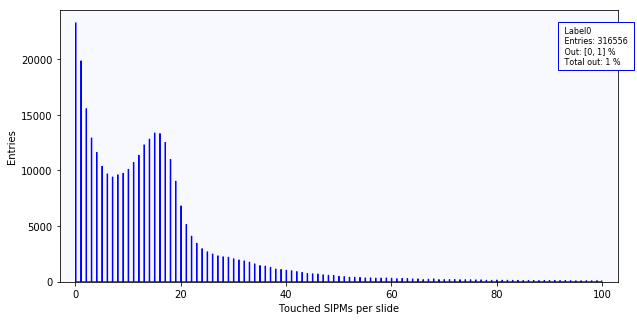

In [49]:
key = "touched_sipms"
histo1D(Sld_icversion [key].values,
        xlabel = "Touched SIPMs per slide",
        bins=1000, 
        xlims=[None, 100],
        scale = "linear")

## Charge per SIPM

In [51]:
sipm_charge = icversion_file.root.SIPM.sipm_charge.read()

/home/gdiaz/miniconda/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


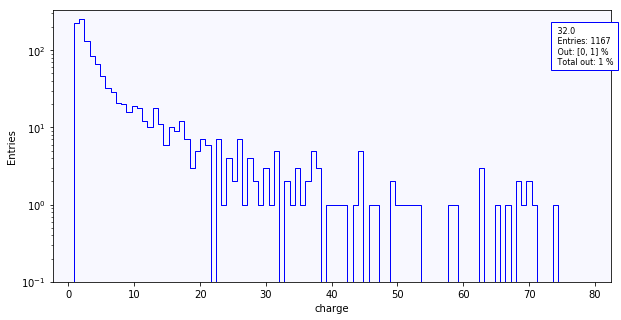

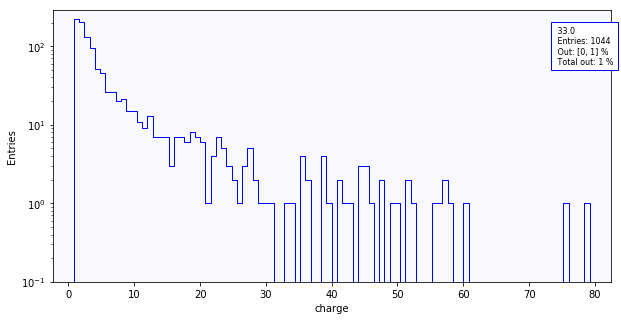

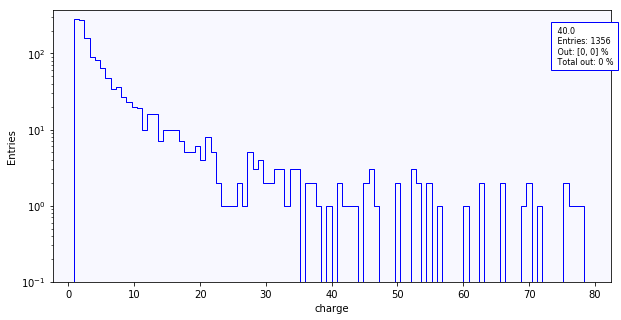

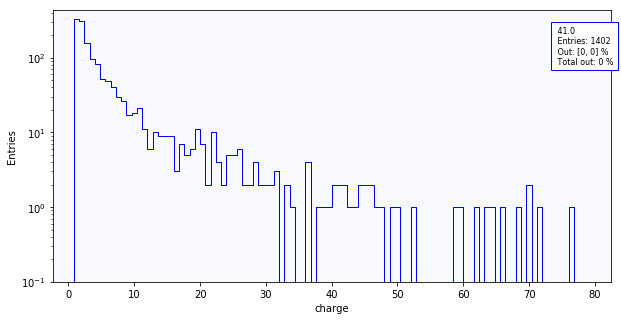

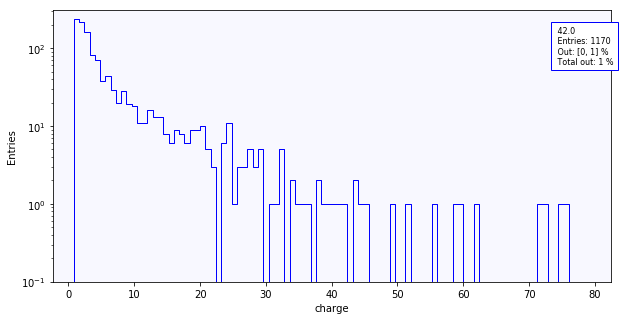

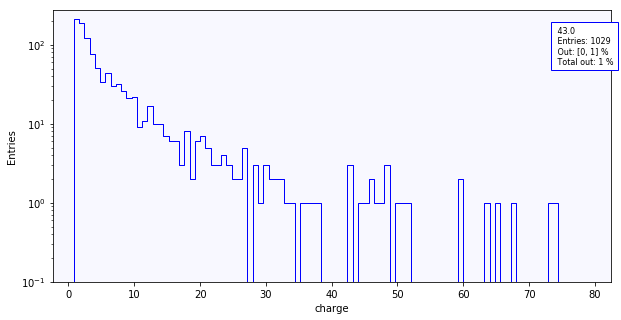

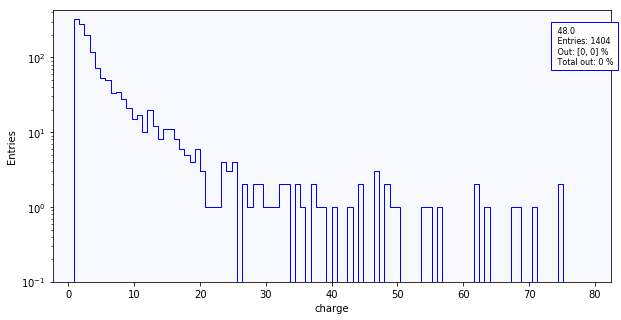

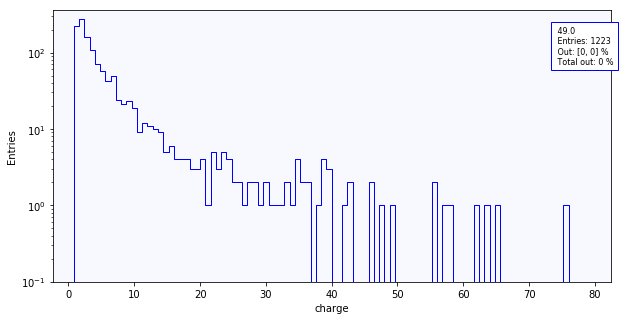

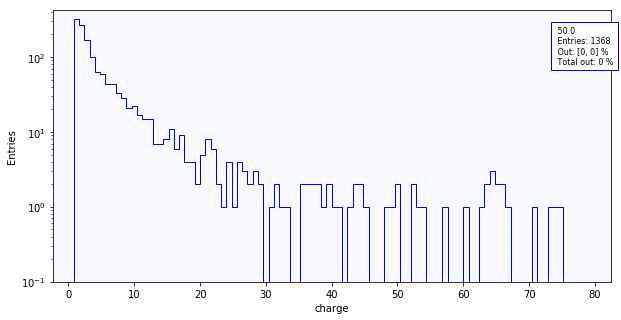

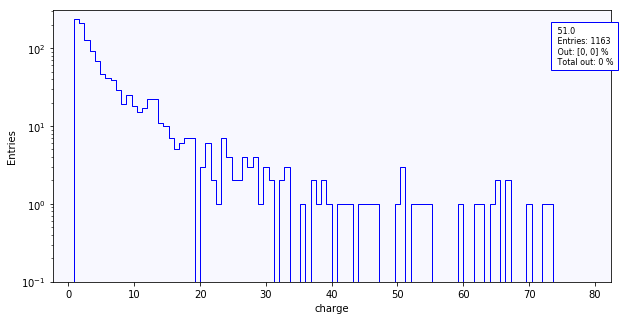

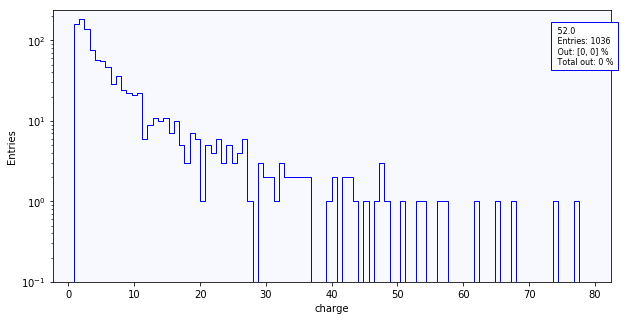

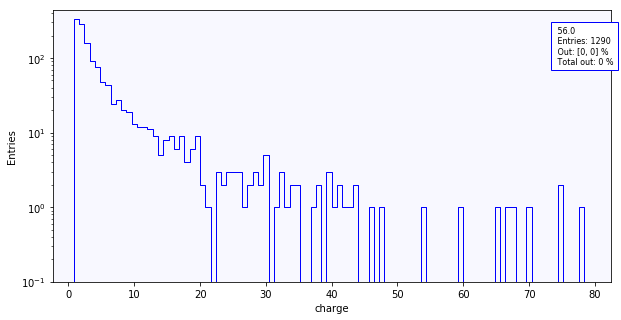

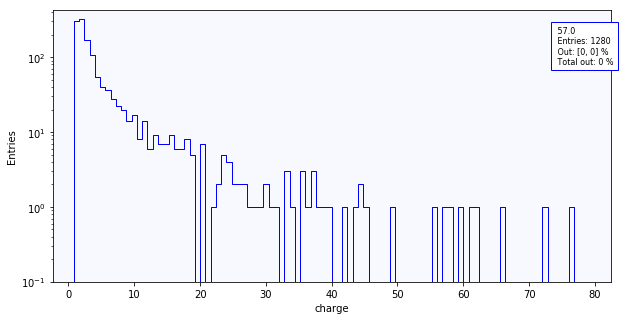

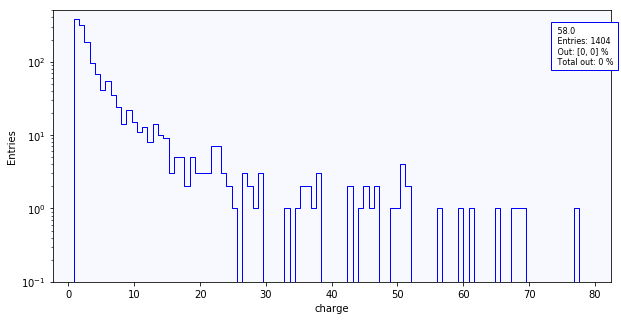

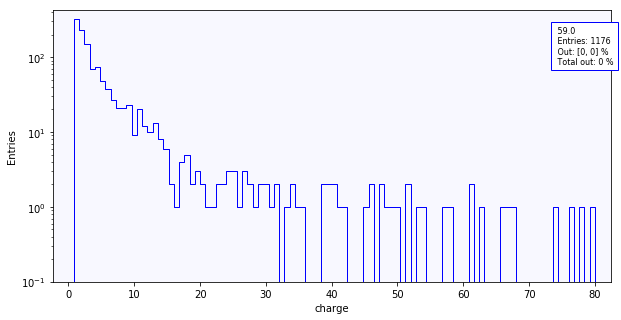

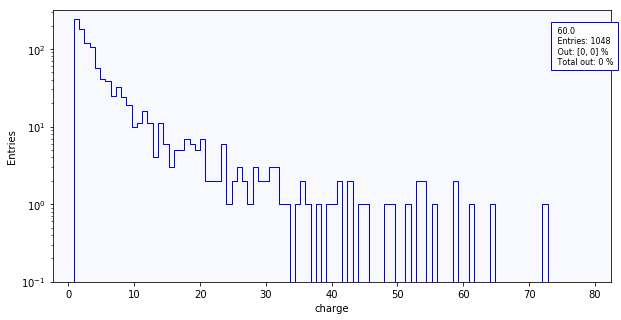

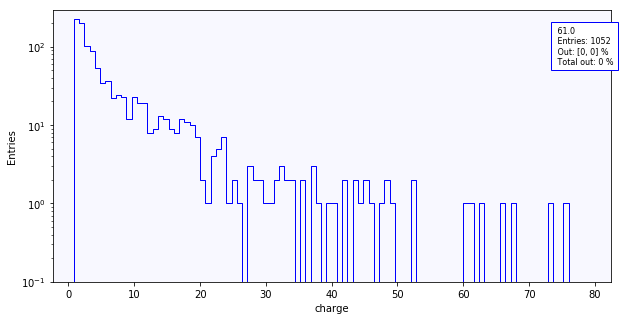

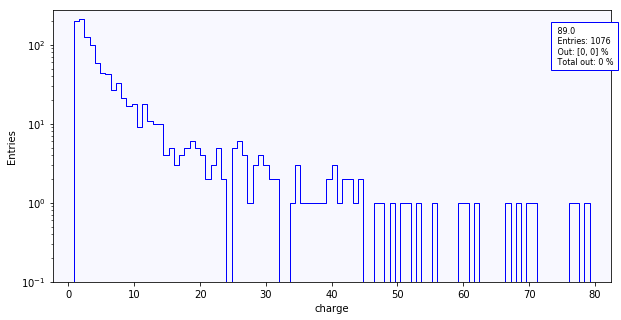

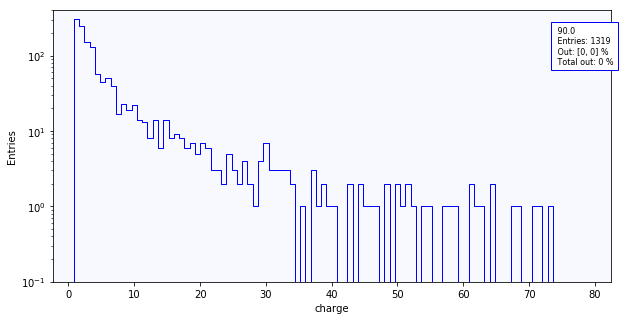

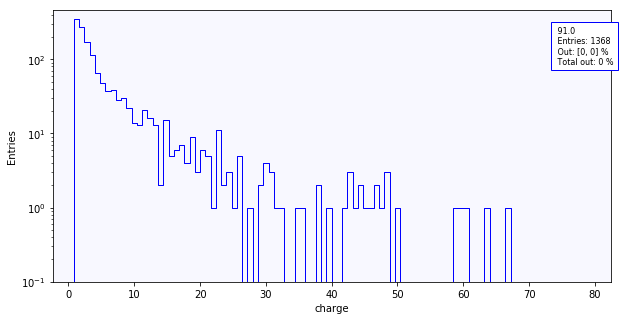

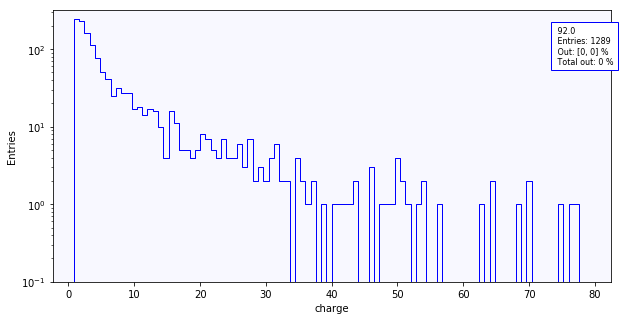

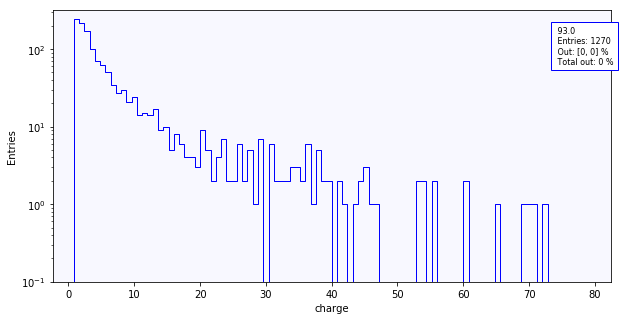

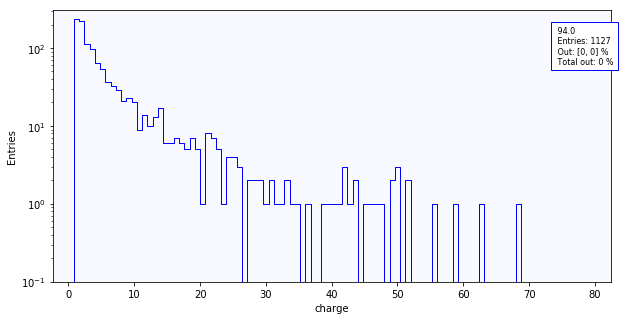

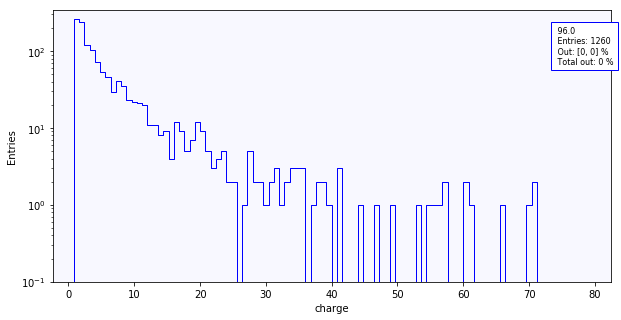

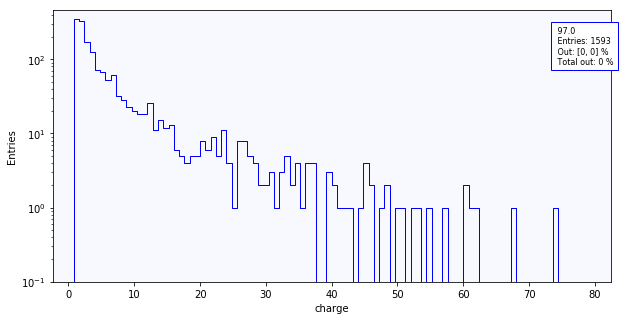

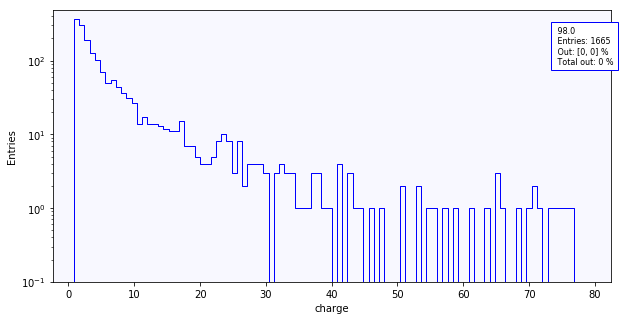

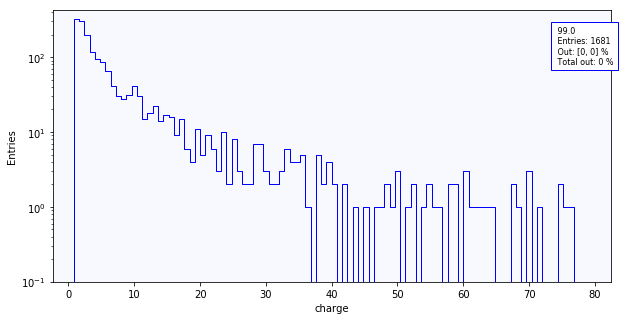

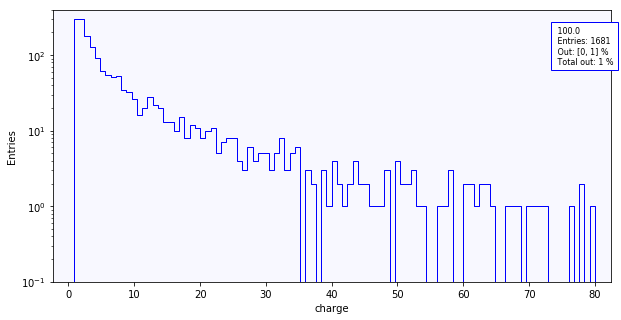

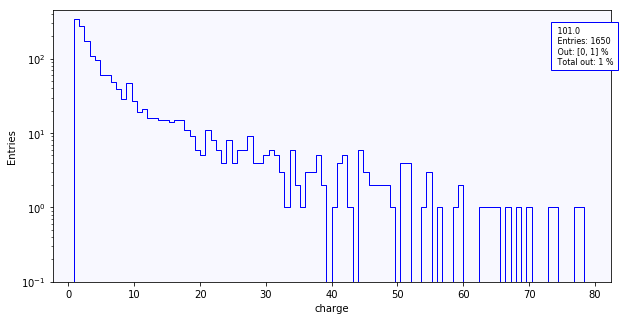

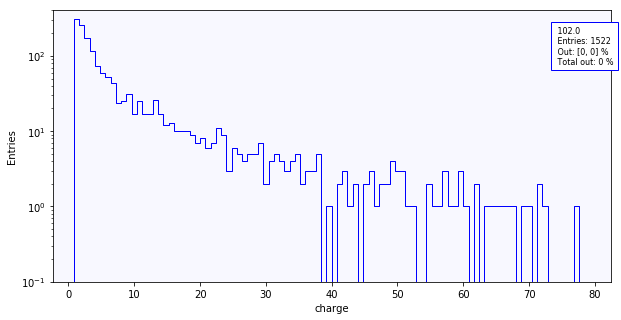

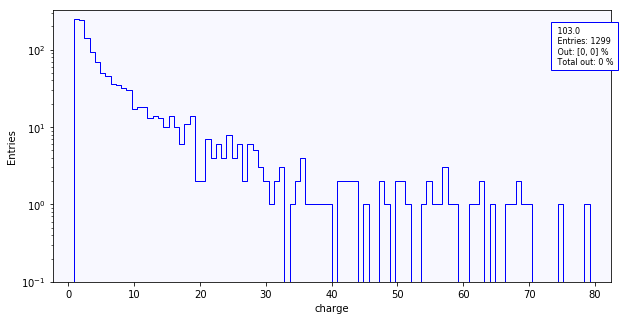

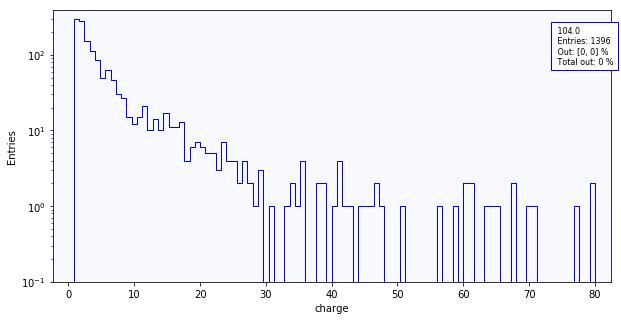

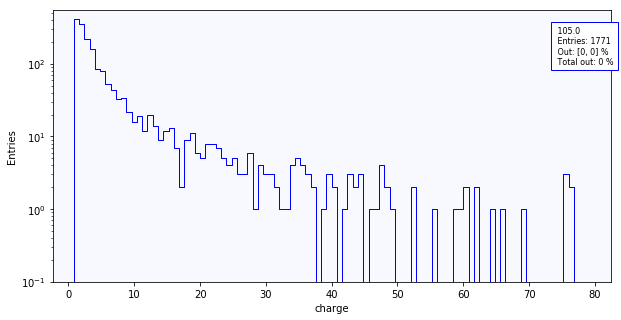

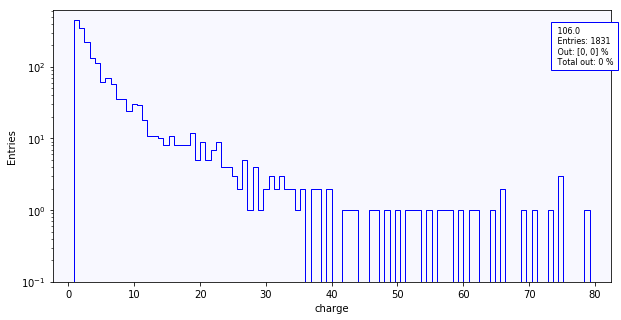

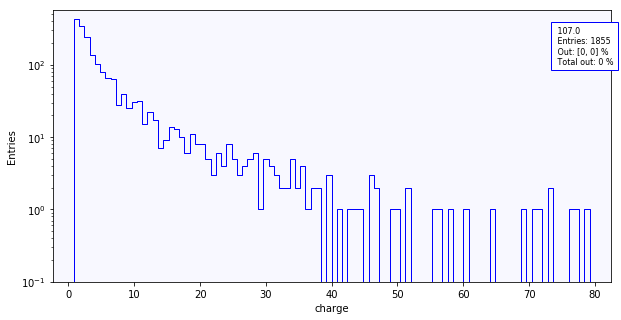

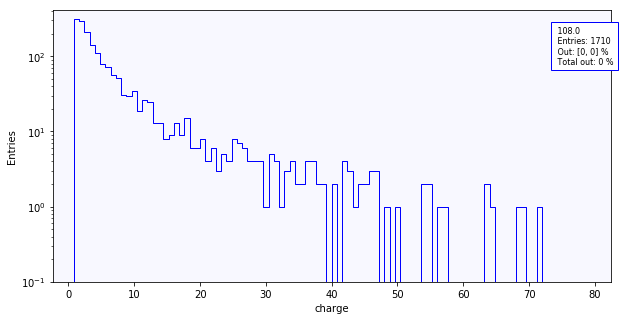

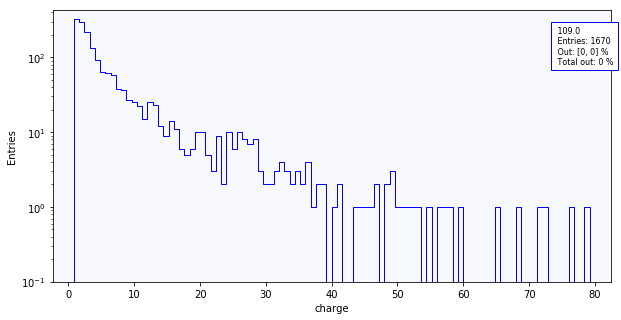

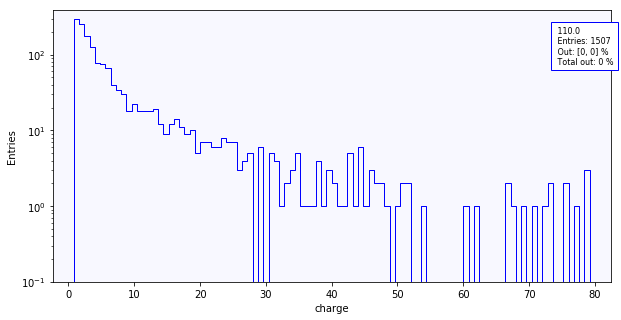

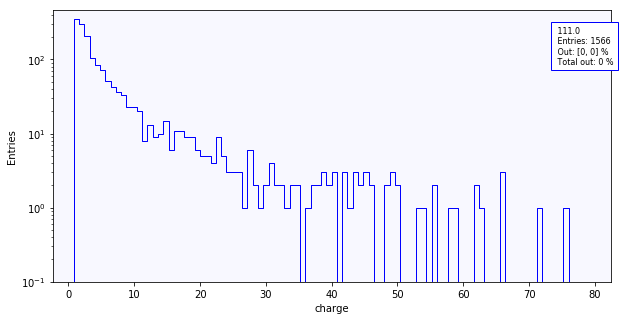

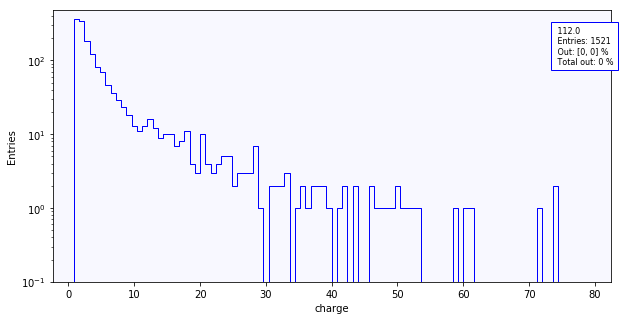

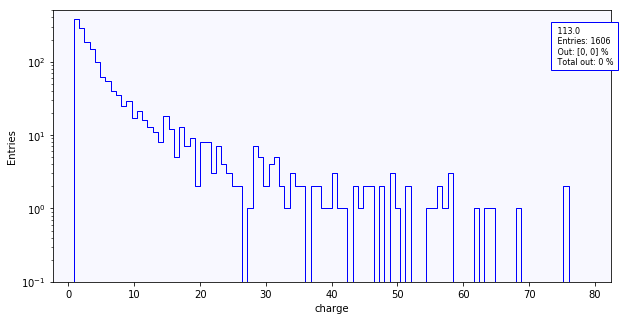

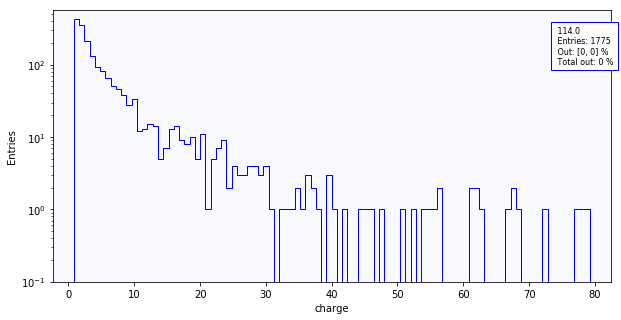

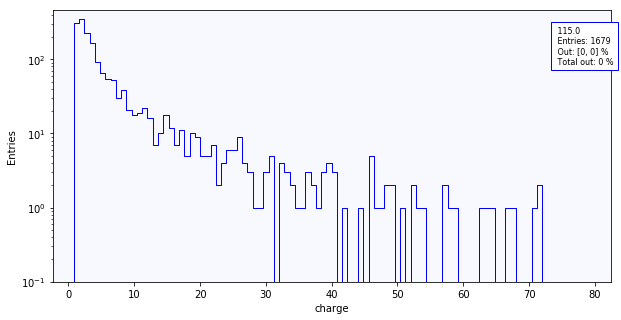

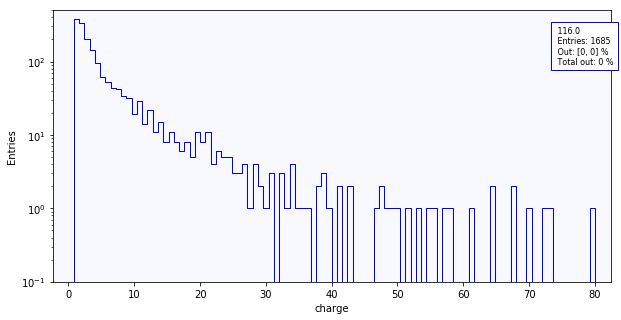

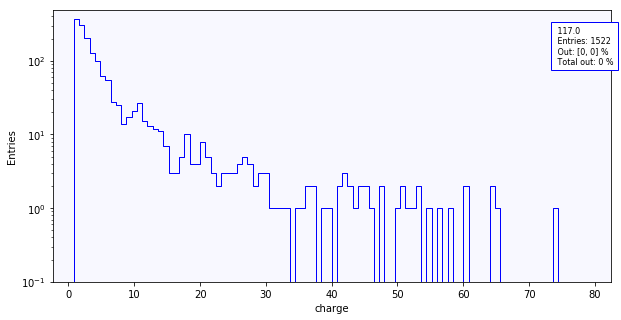

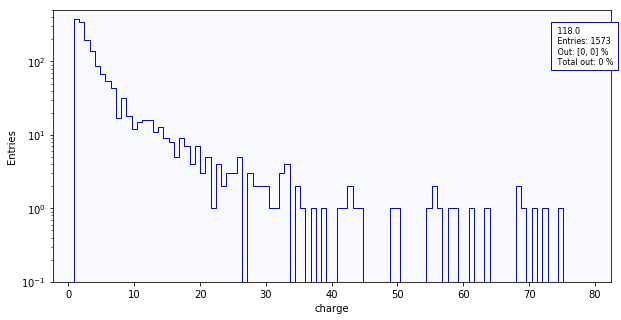

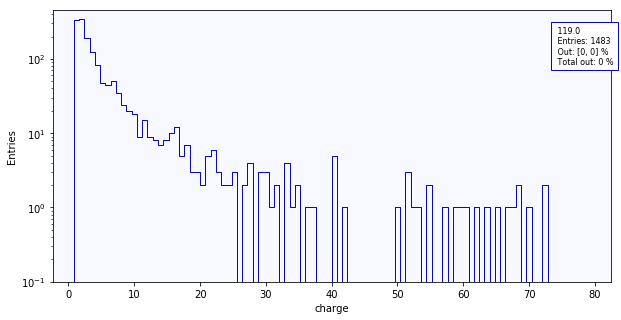

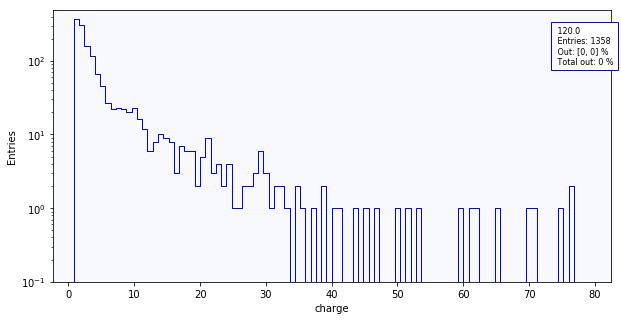

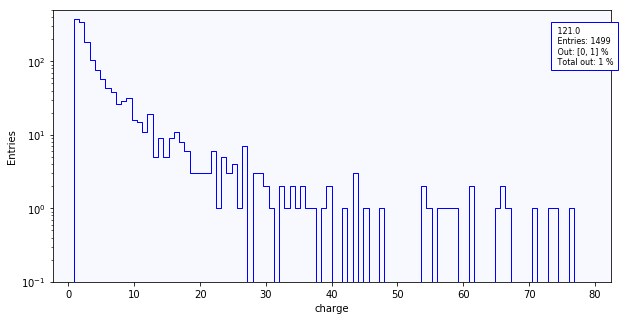

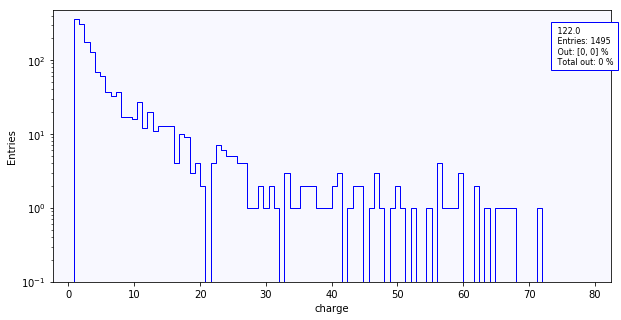

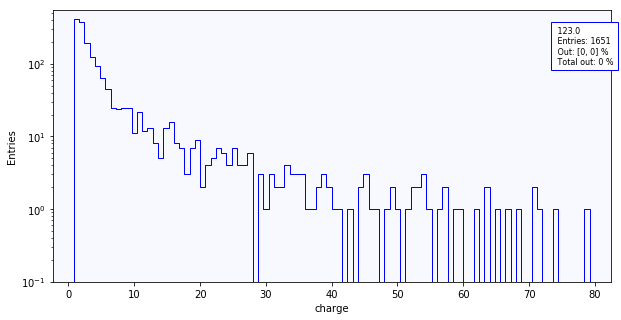

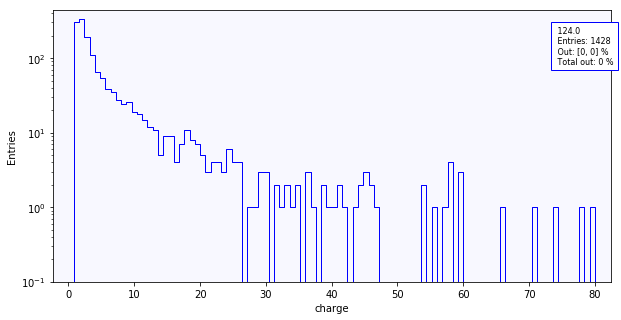

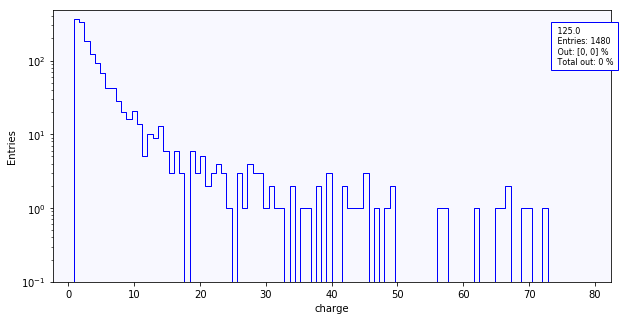

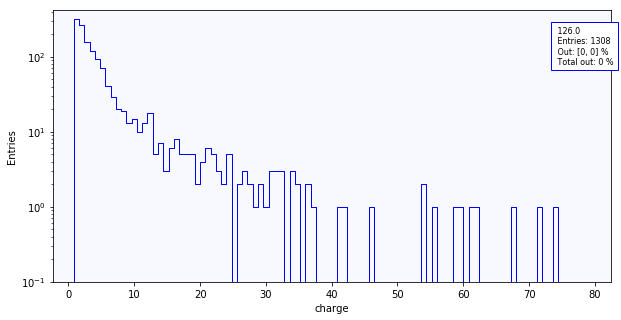

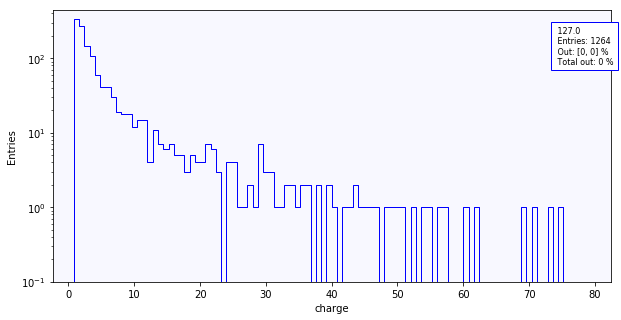

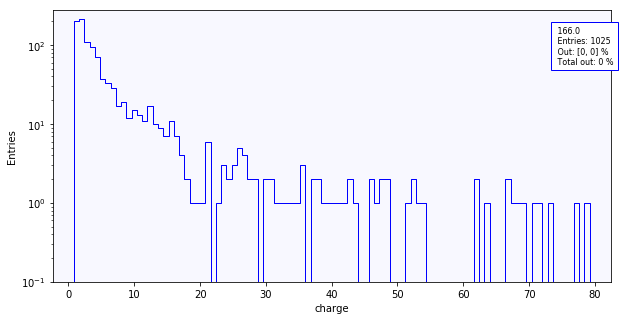

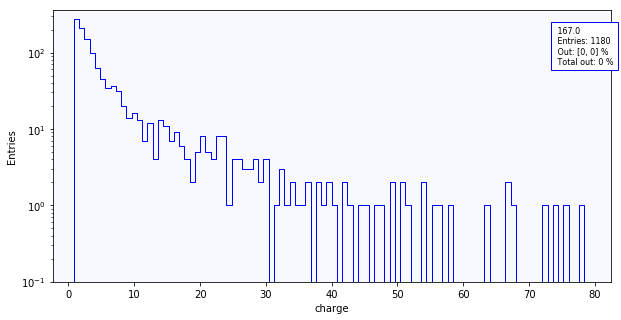

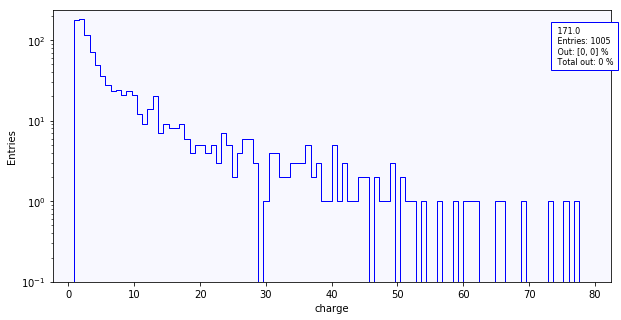

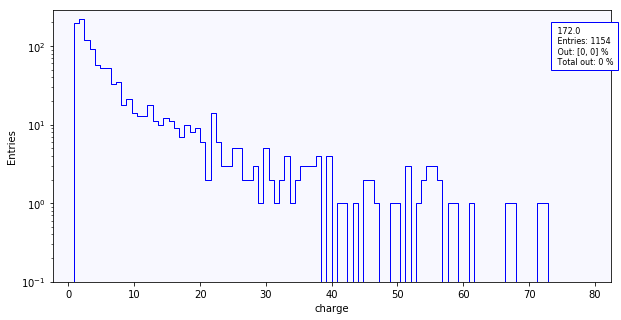

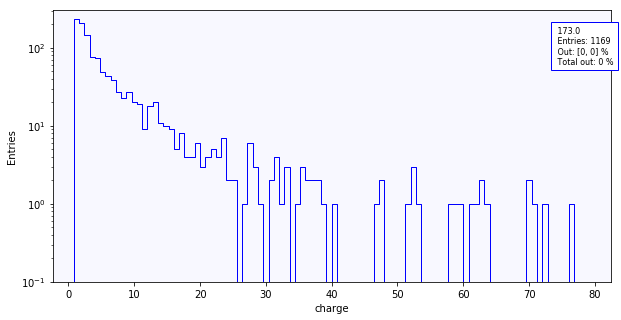

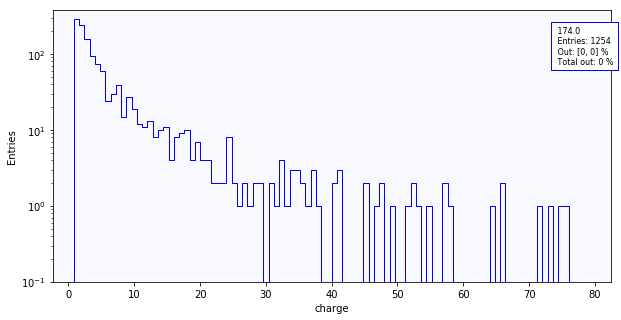

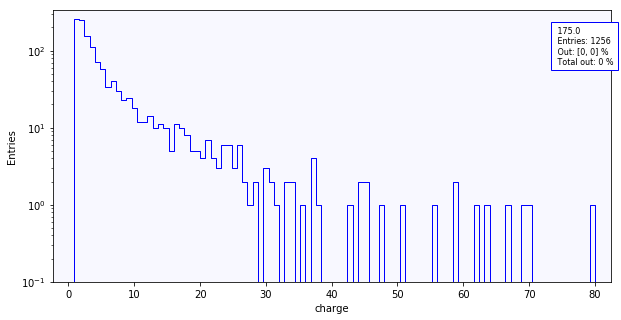

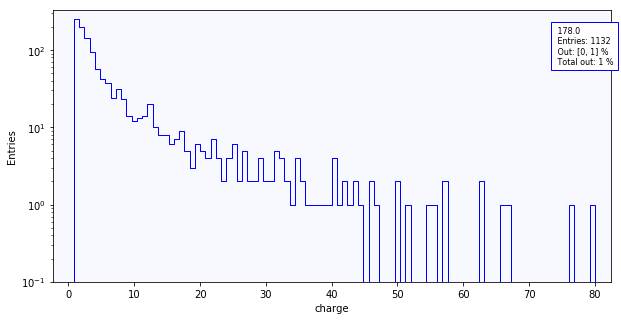

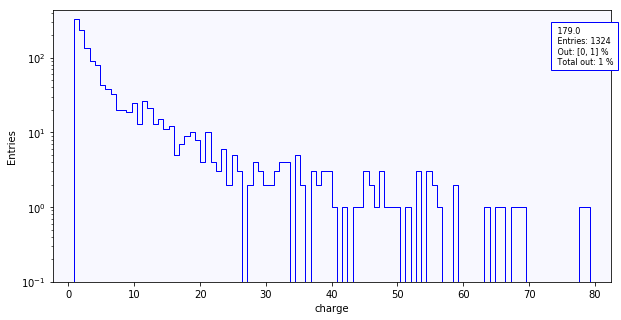

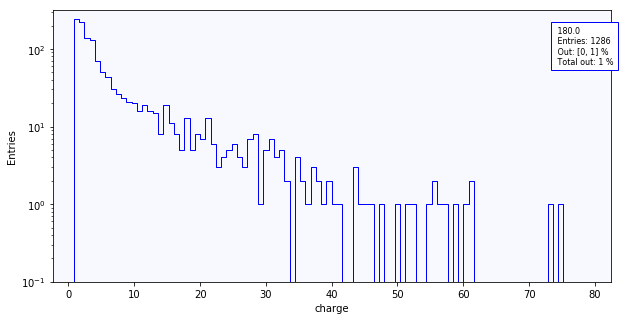

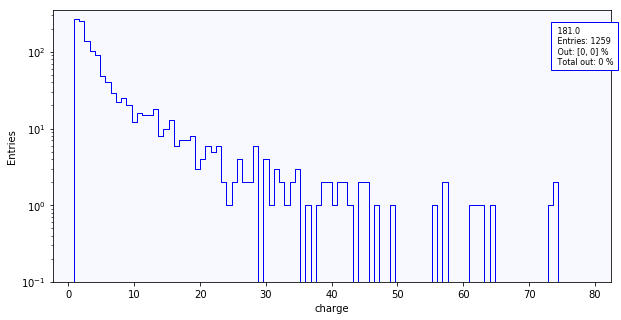

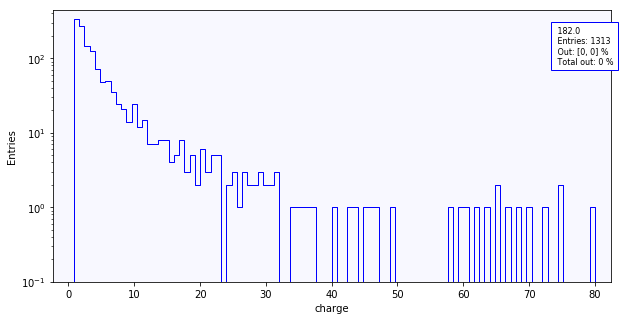

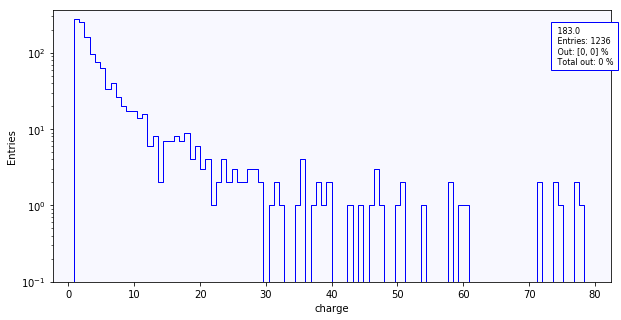

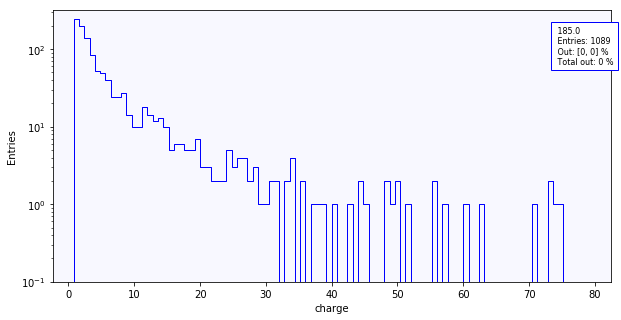

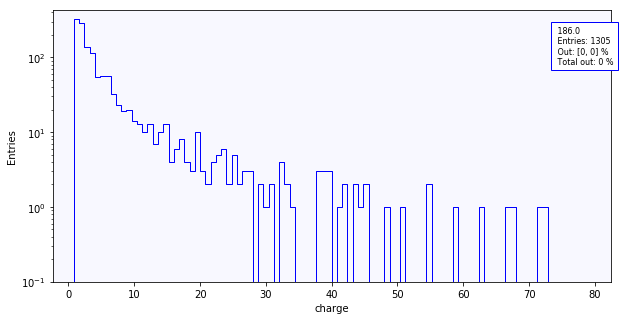

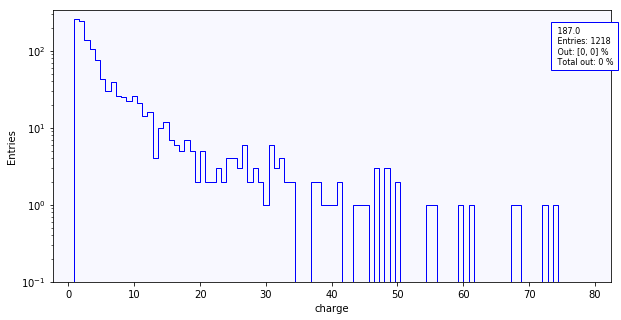

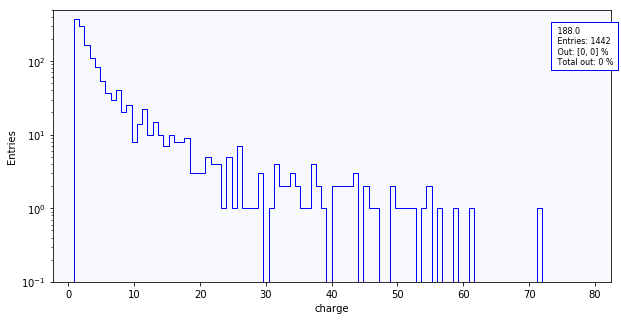

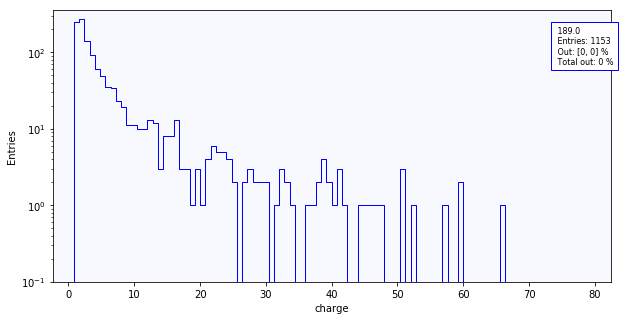

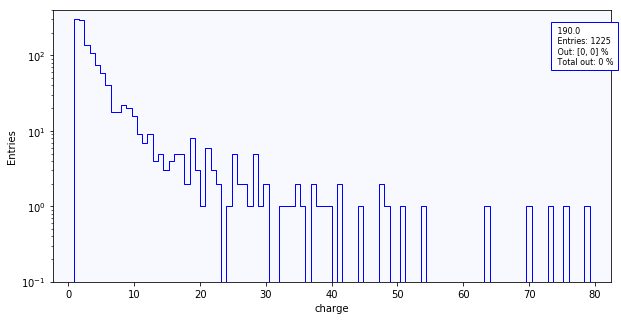

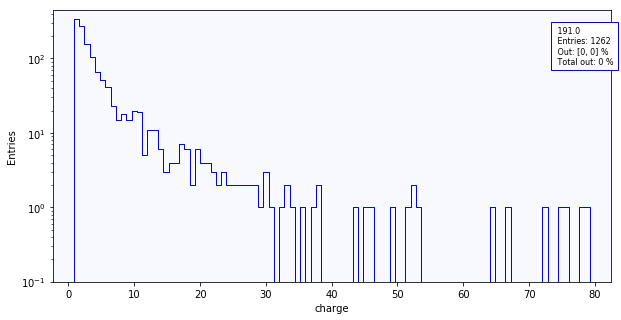

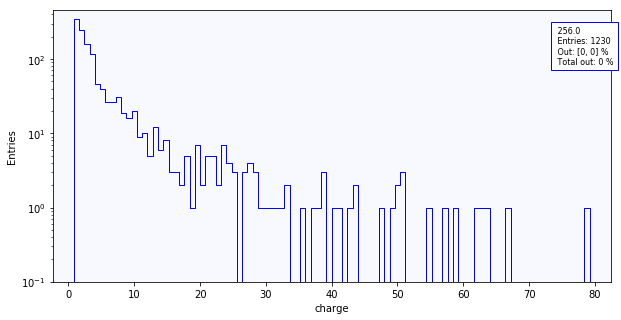

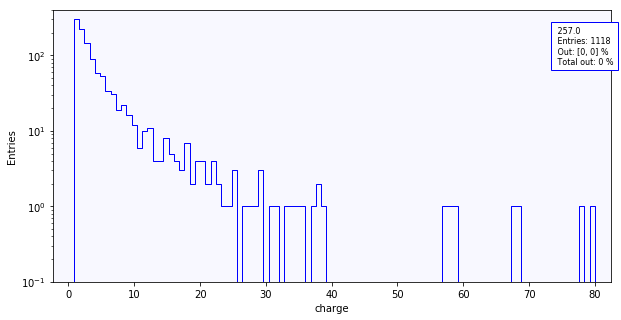

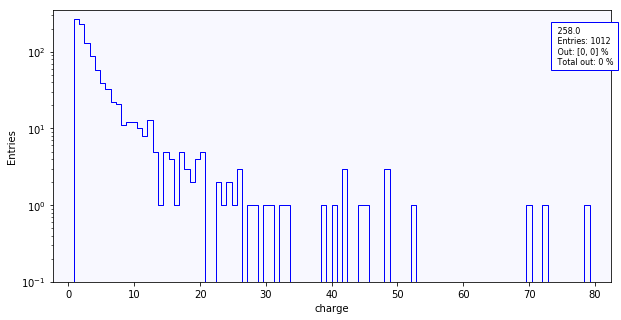

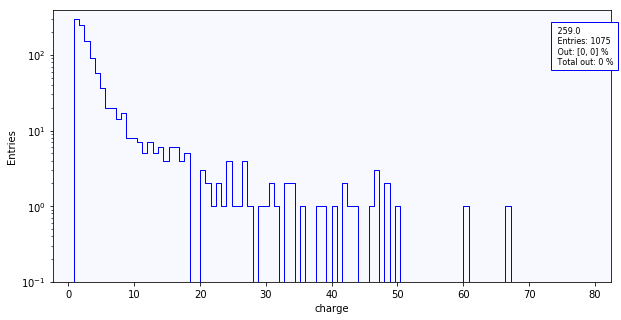

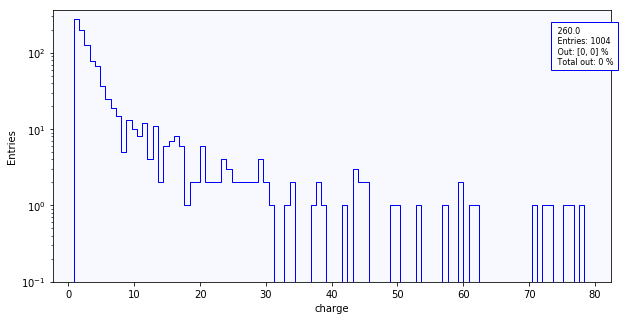

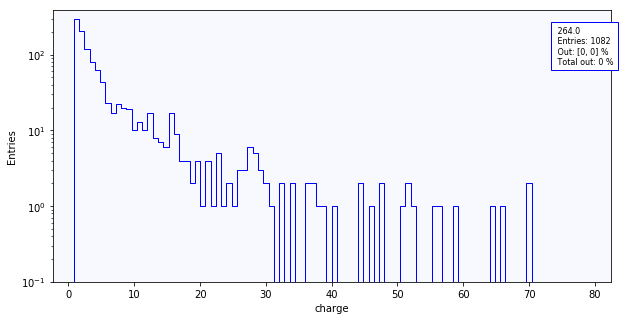

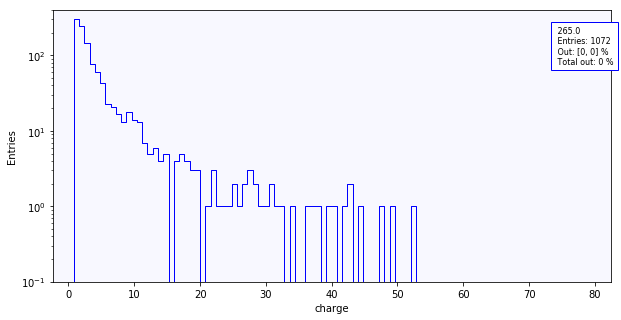

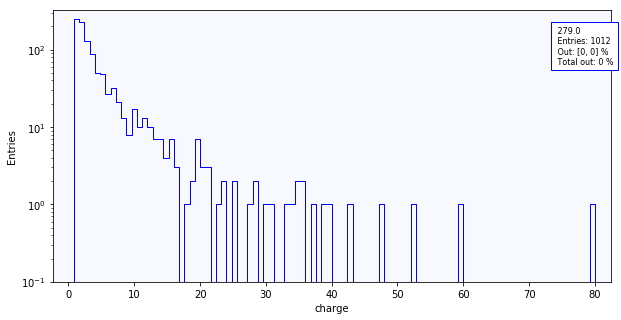

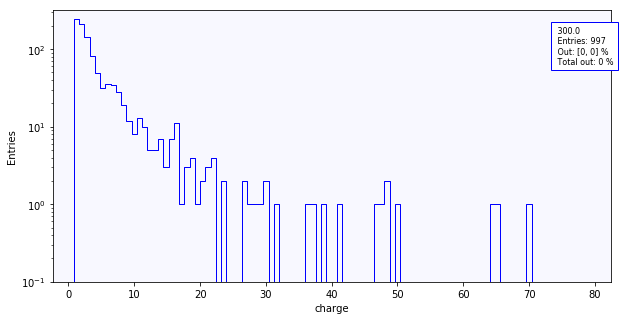

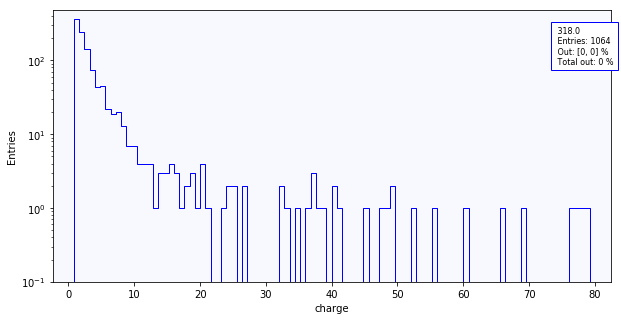

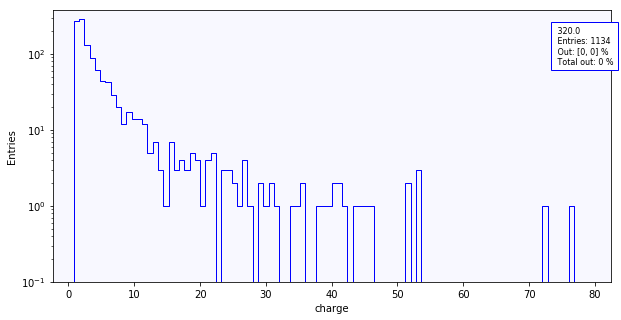

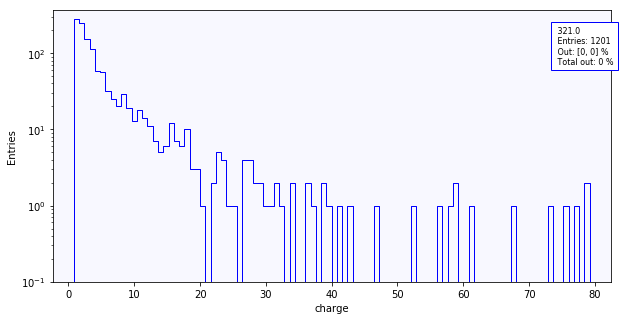

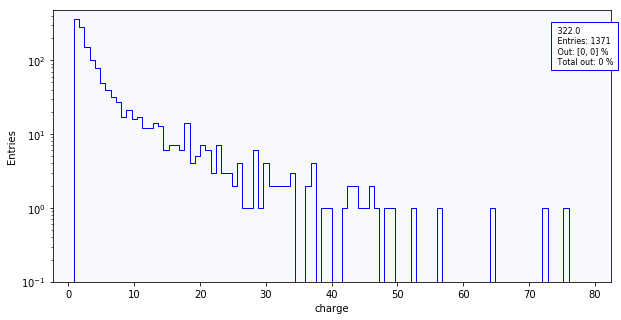

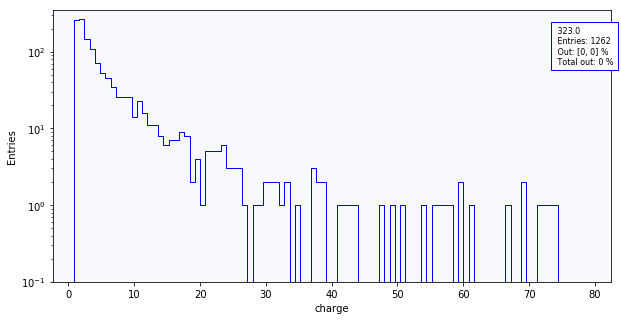

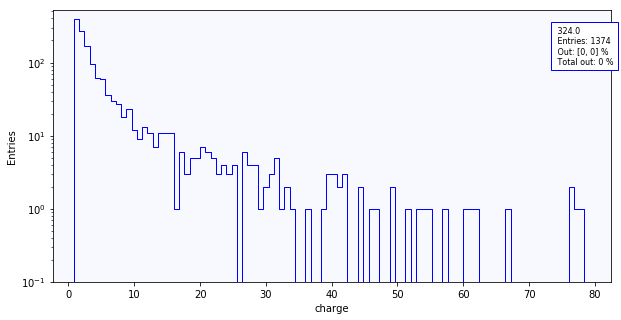

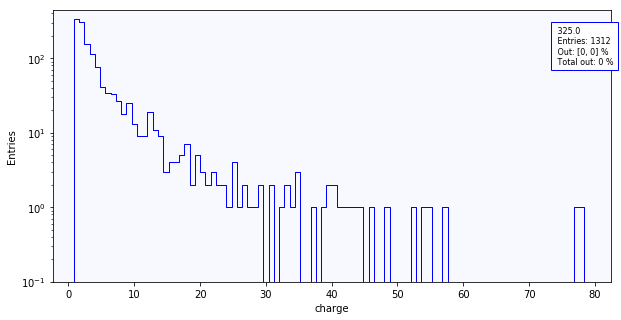

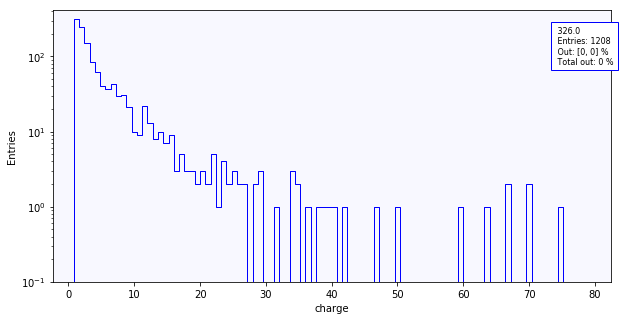

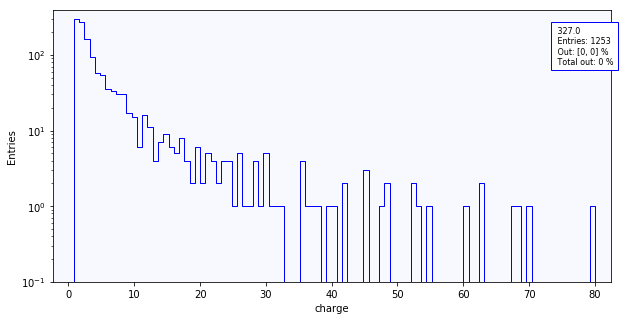

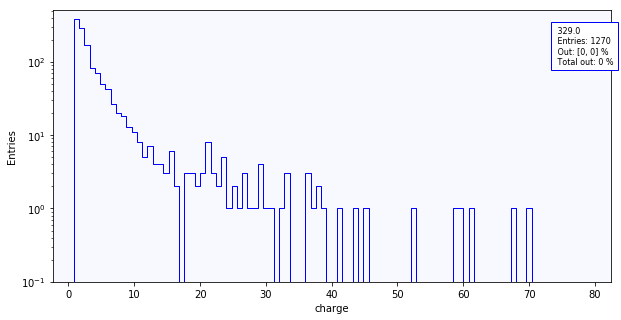

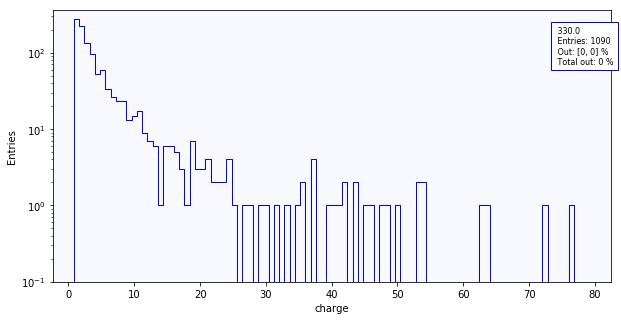

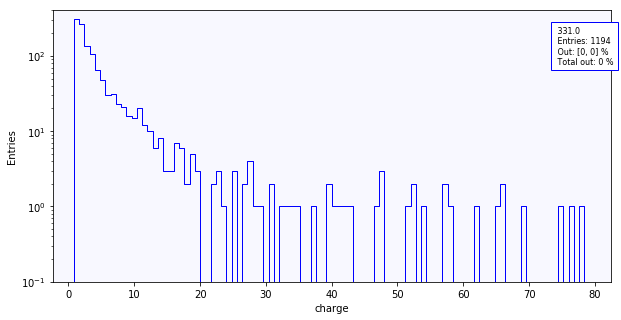

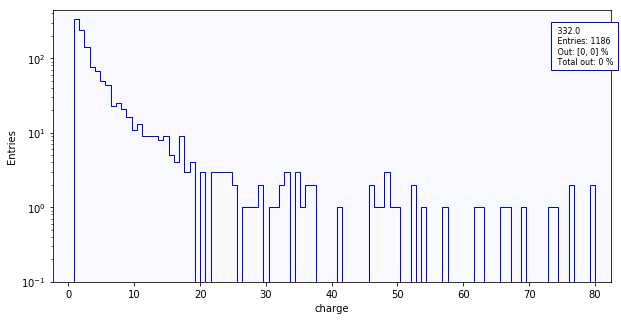

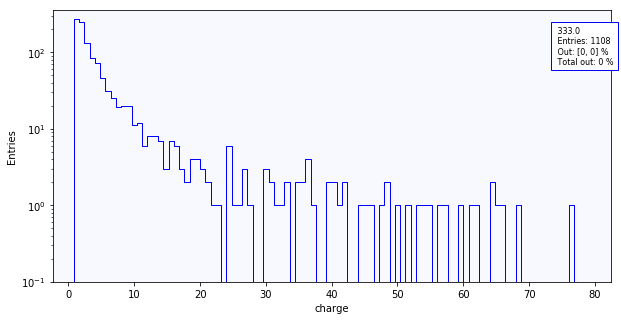

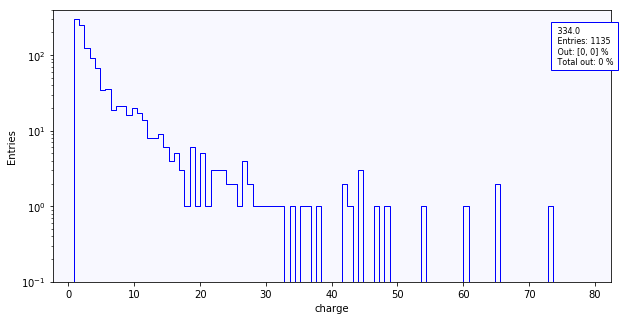

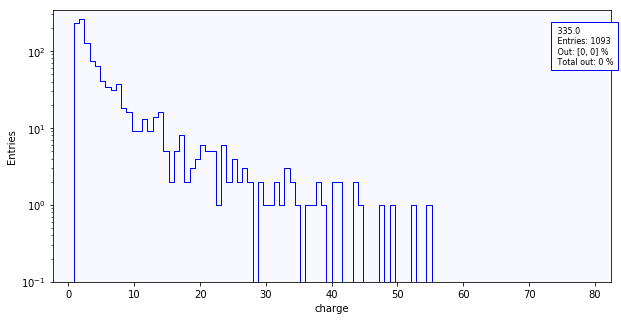

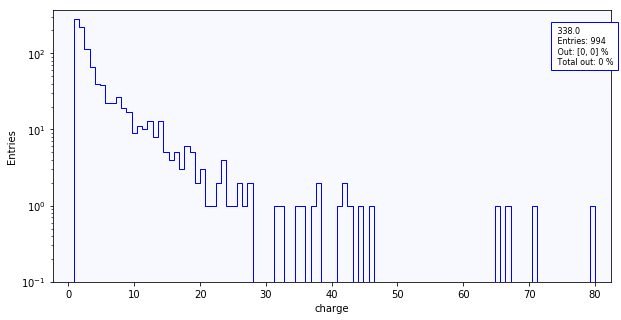

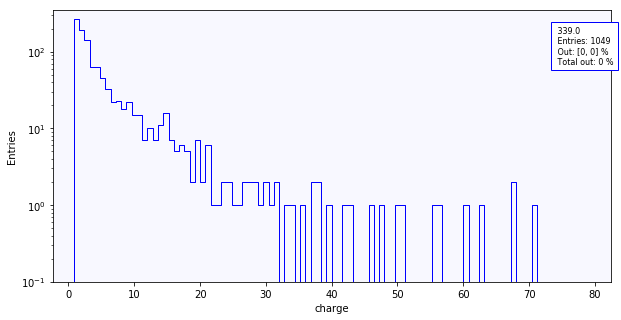

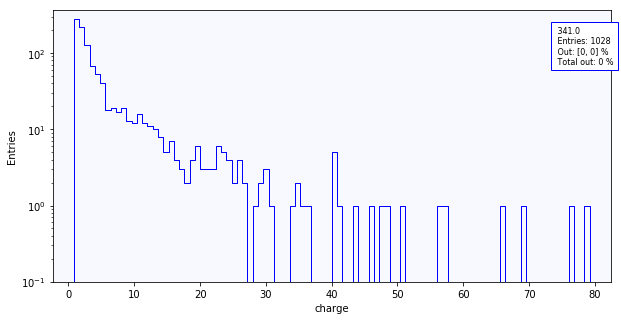

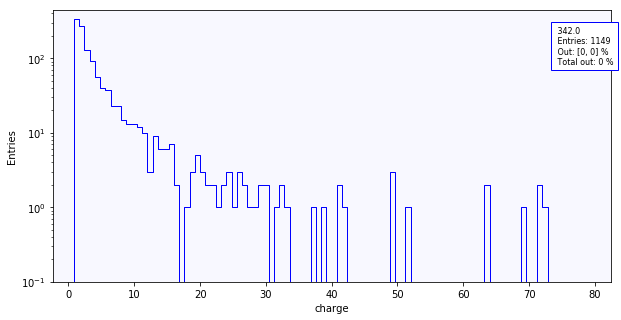

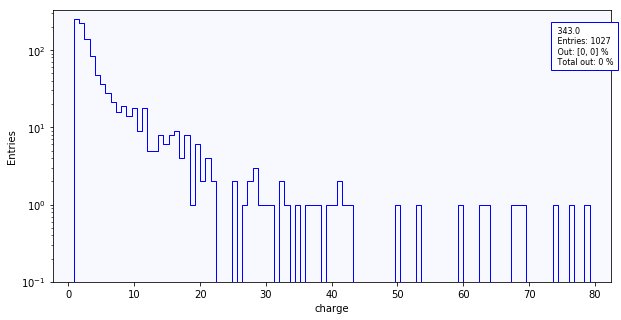

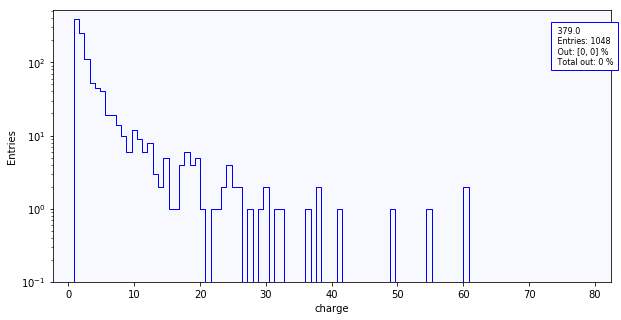

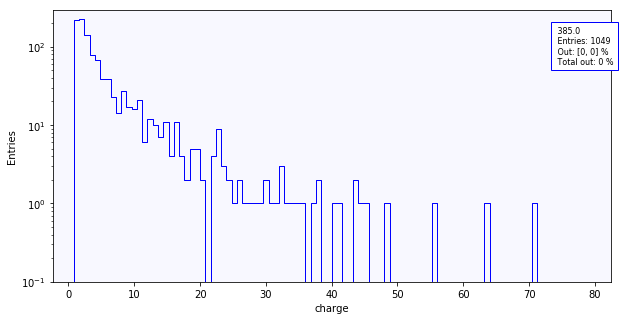

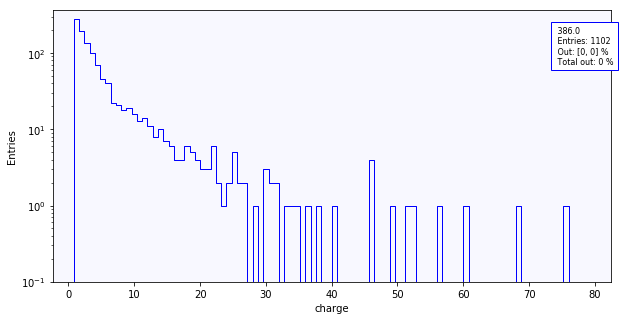

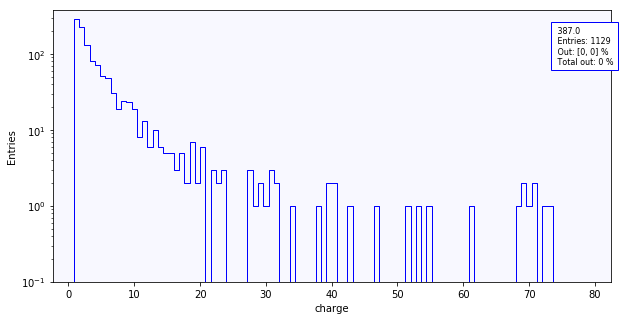

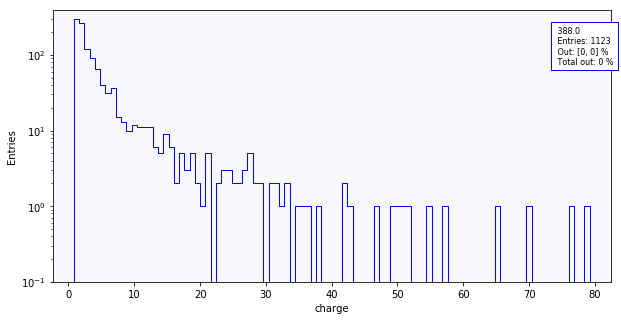

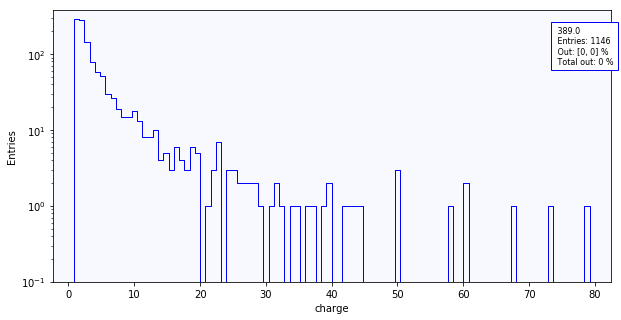

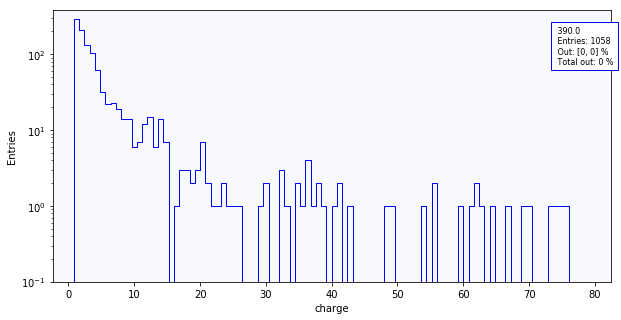

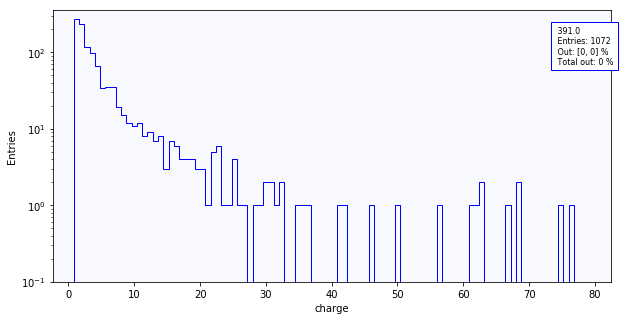

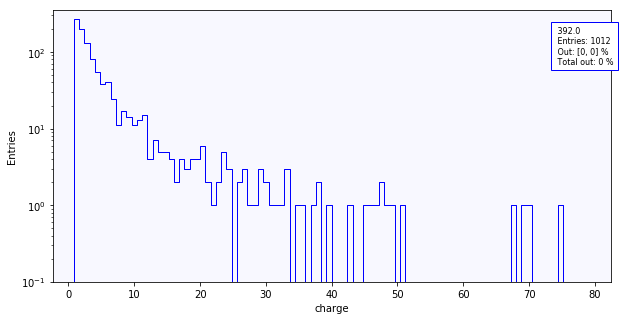

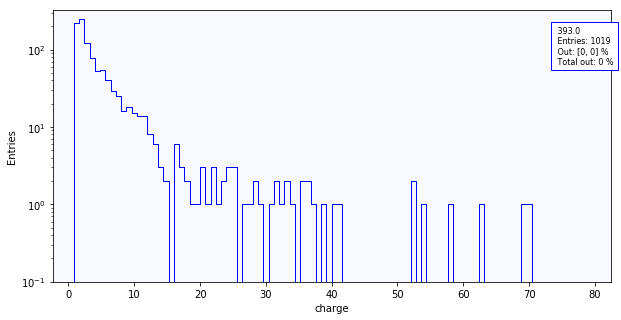

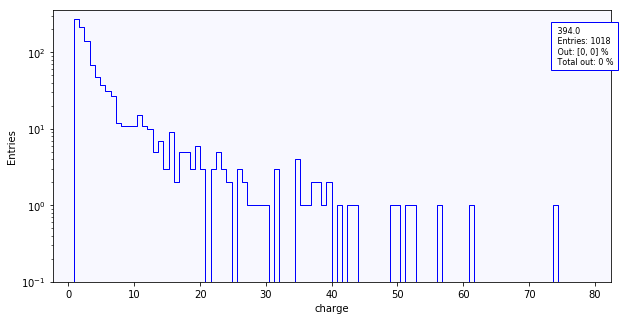

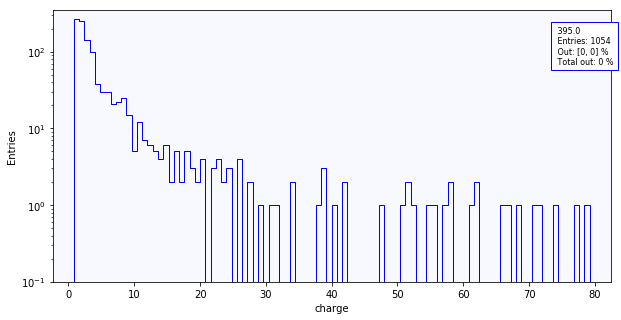

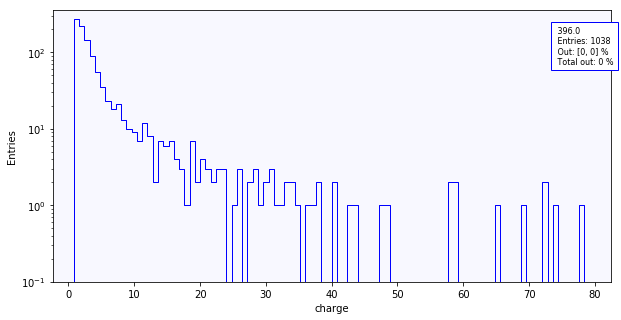

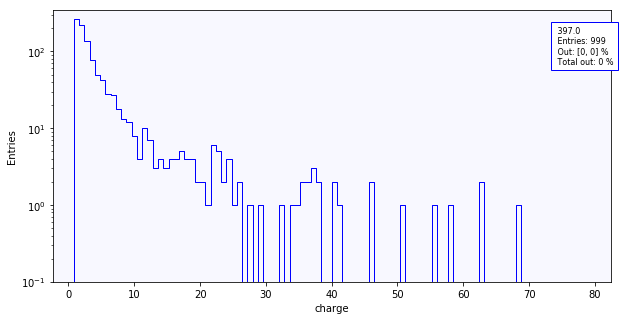

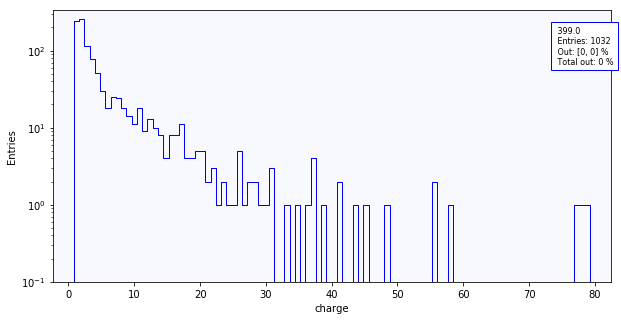

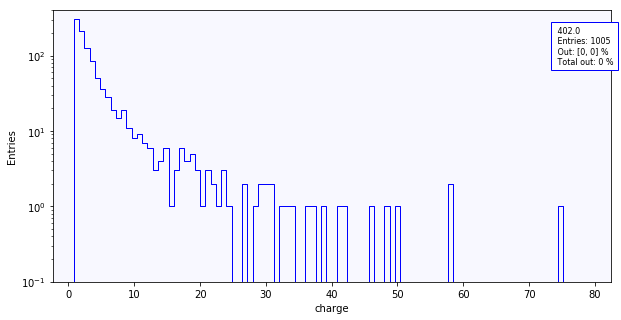

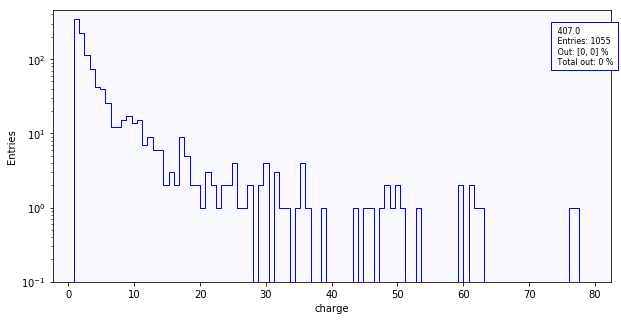

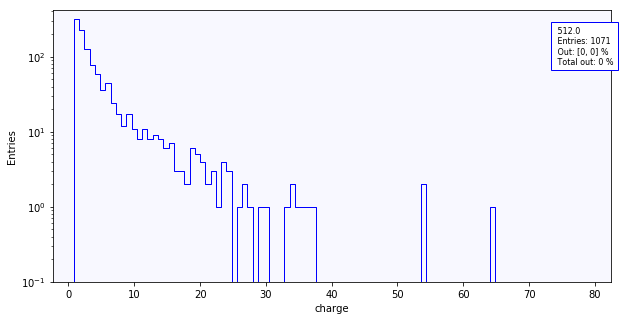

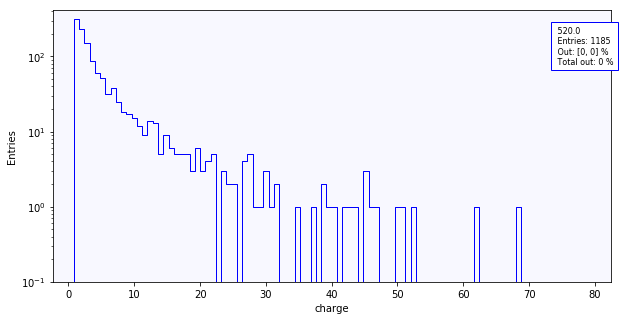

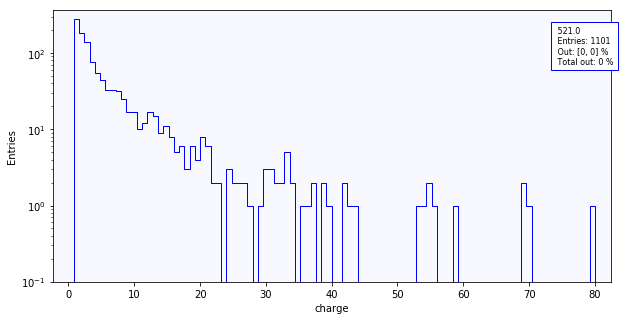

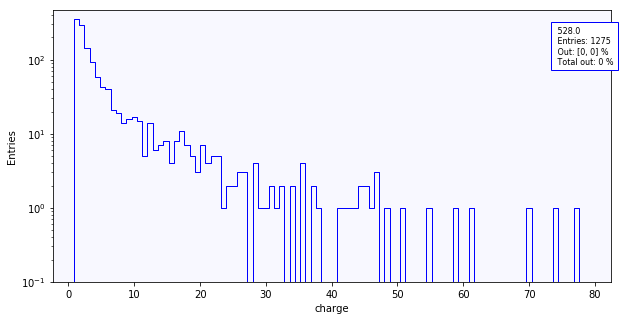

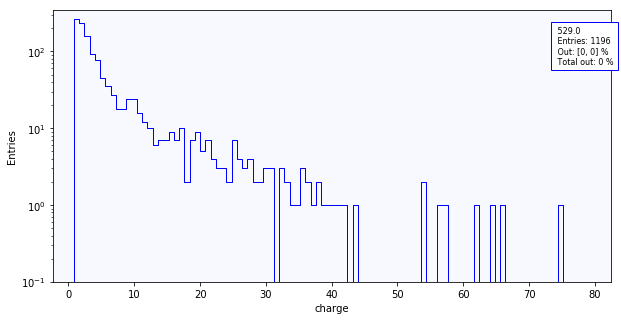

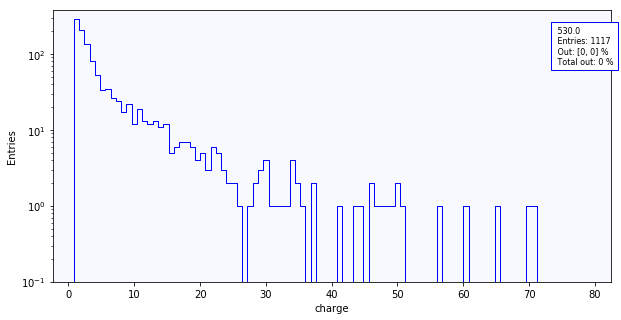

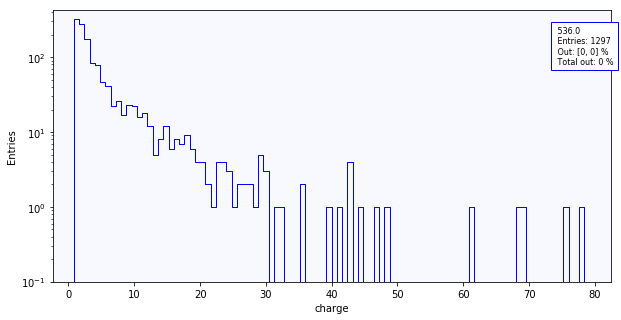

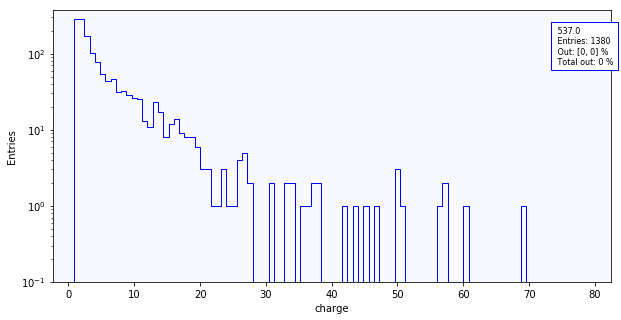

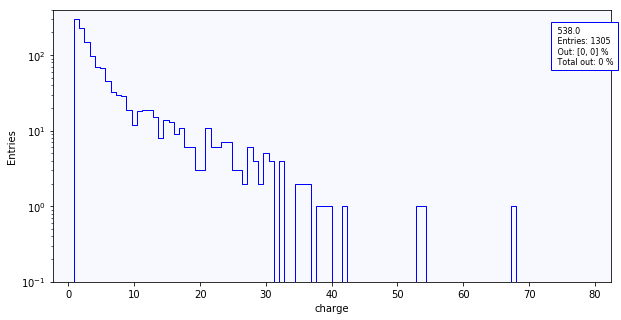

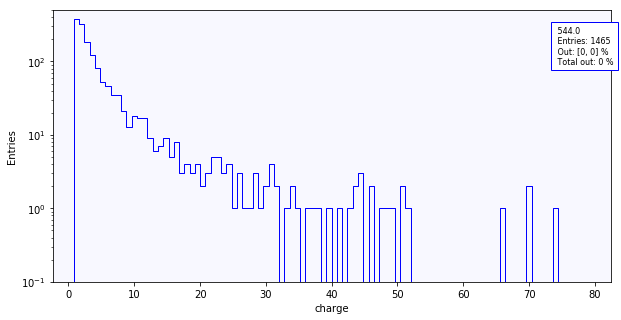

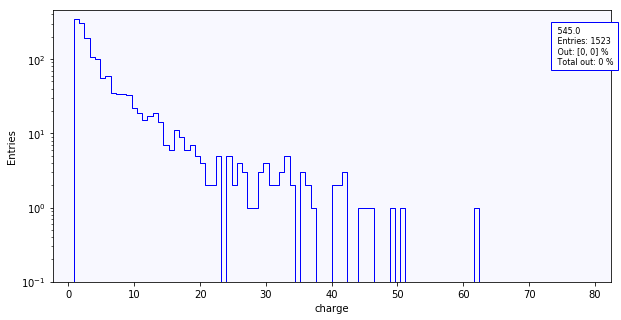

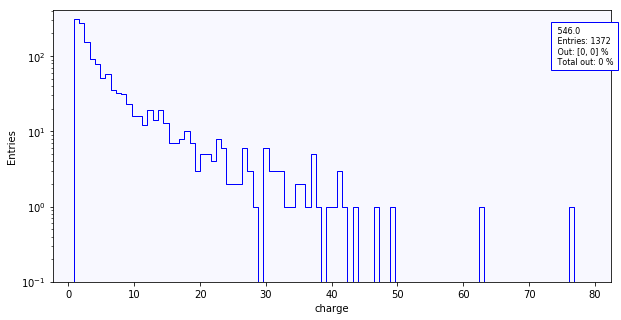

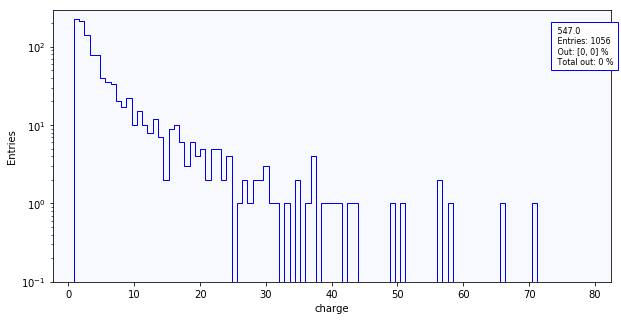

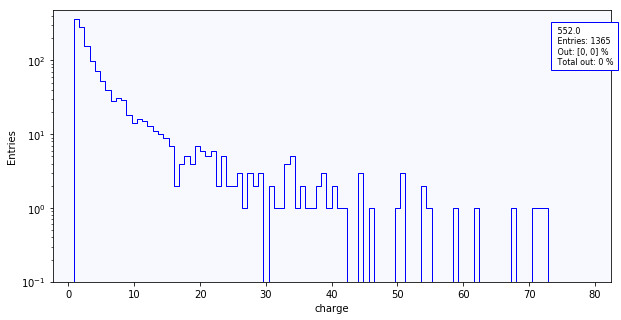

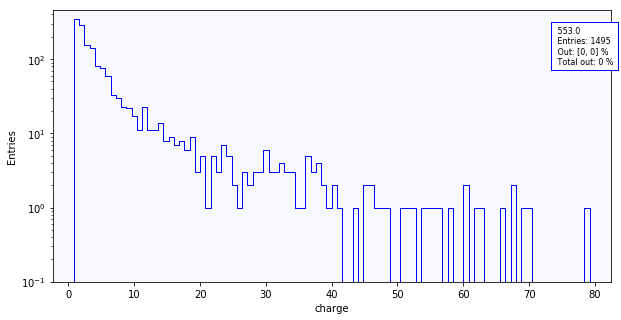

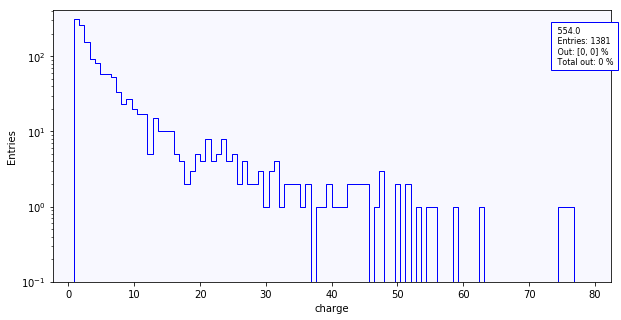

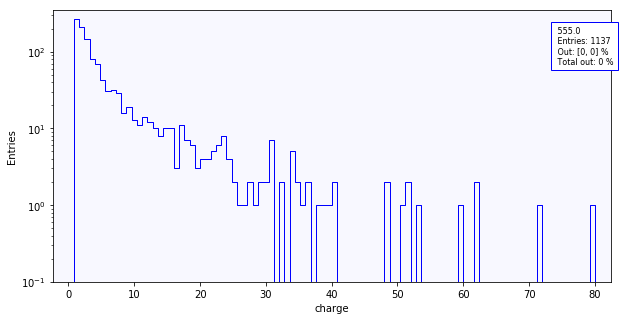

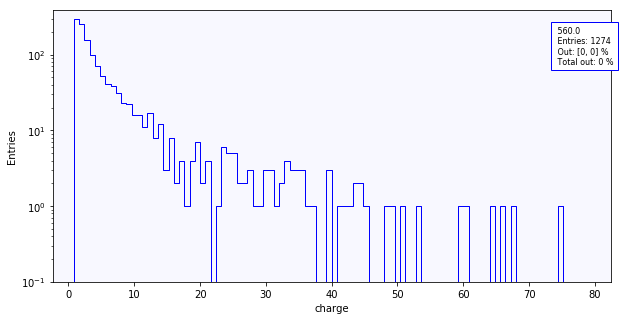

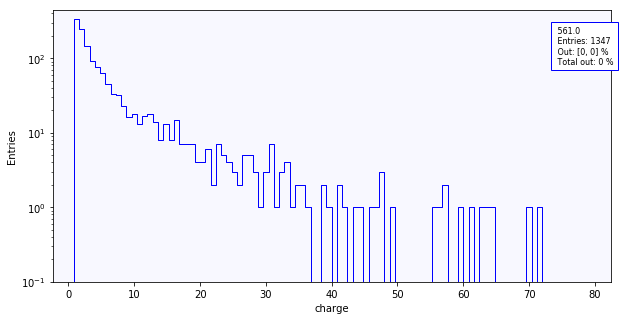

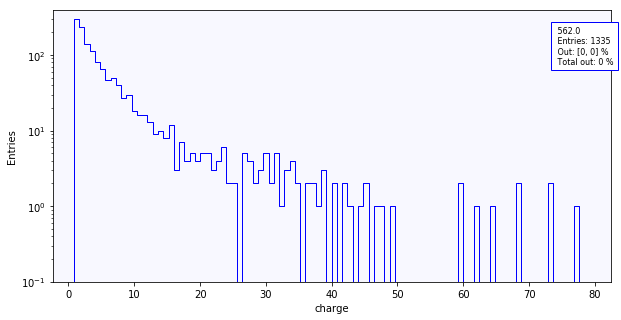

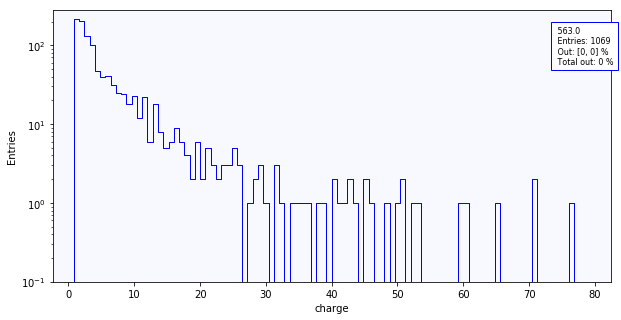

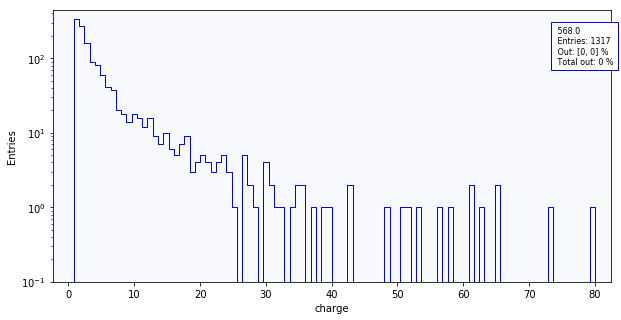

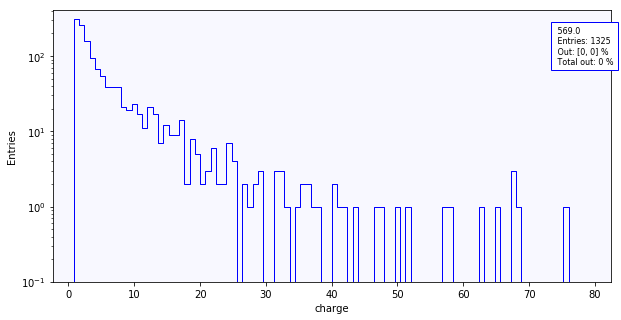

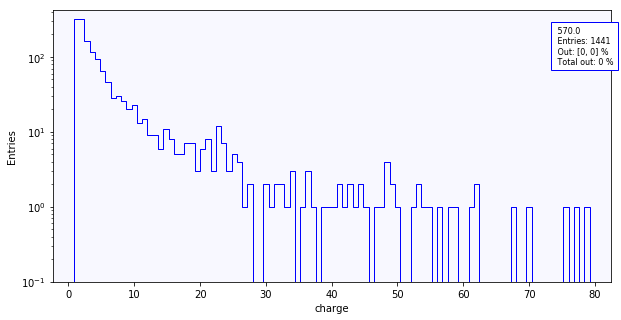

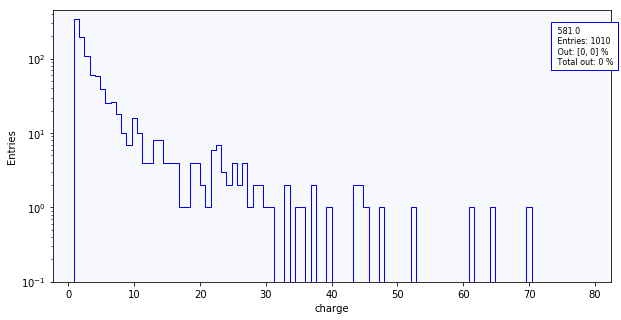

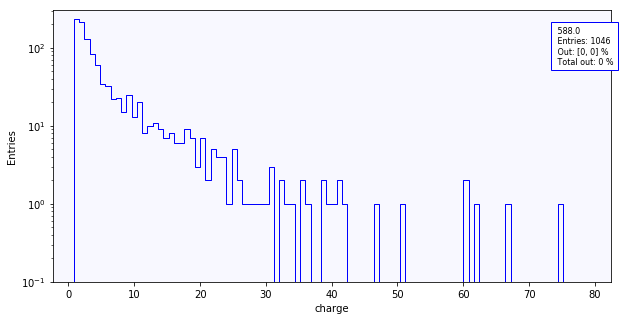

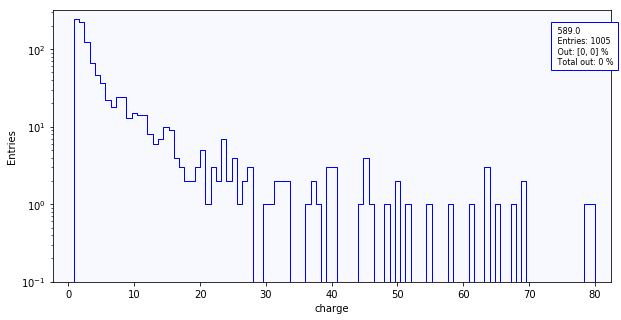

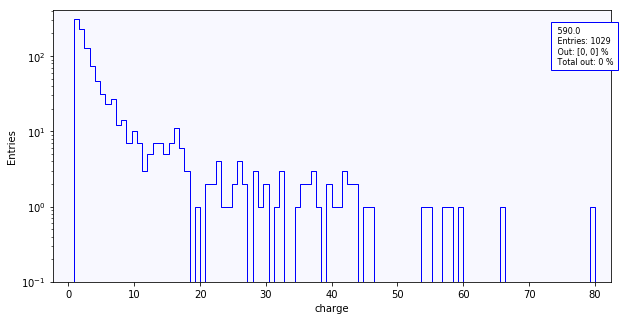

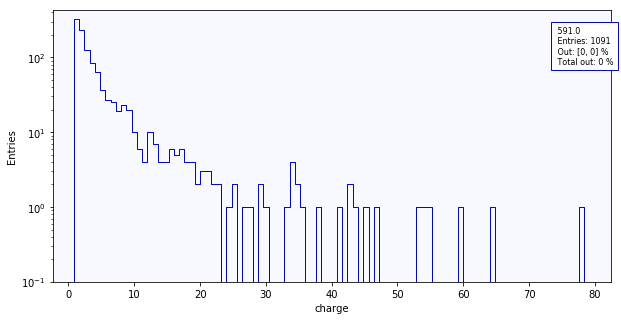

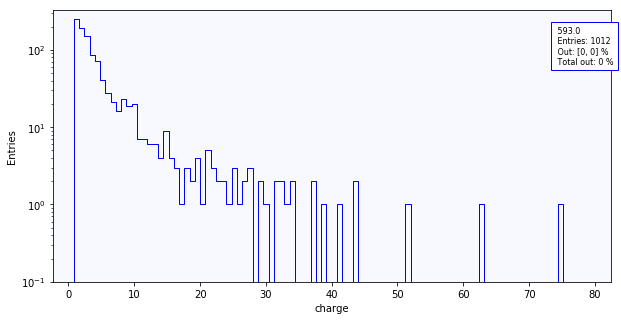

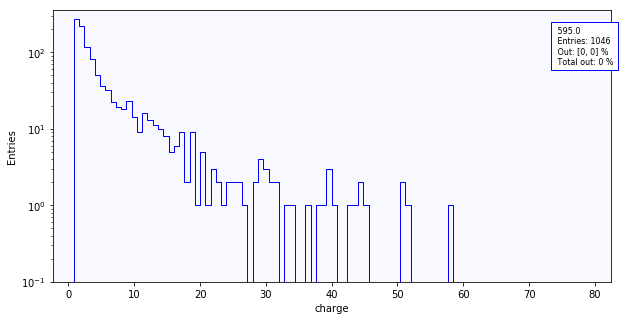

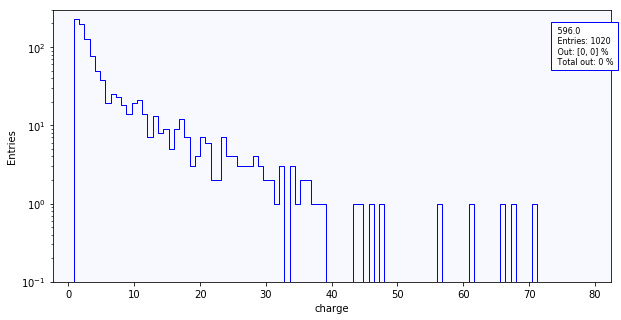

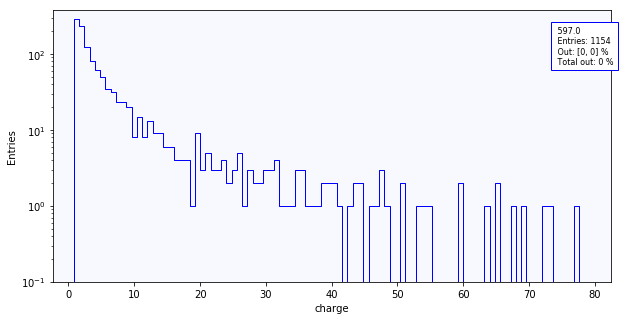

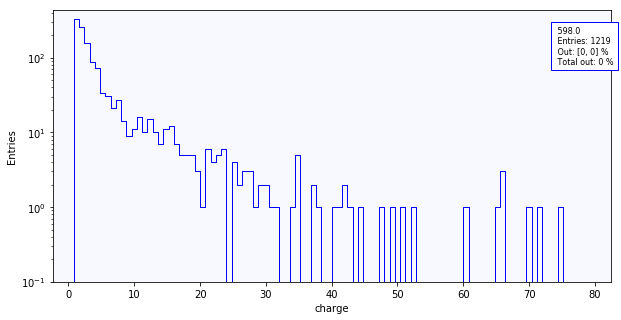

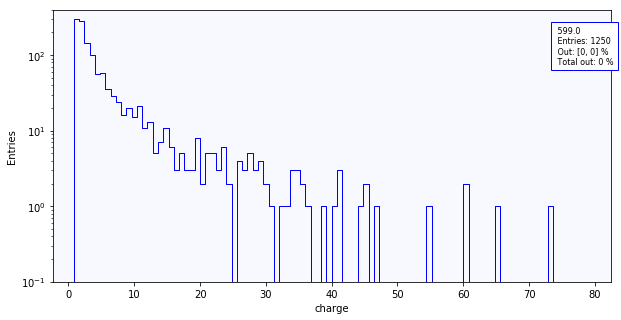

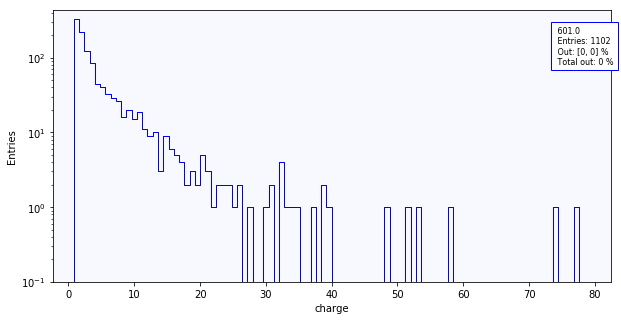

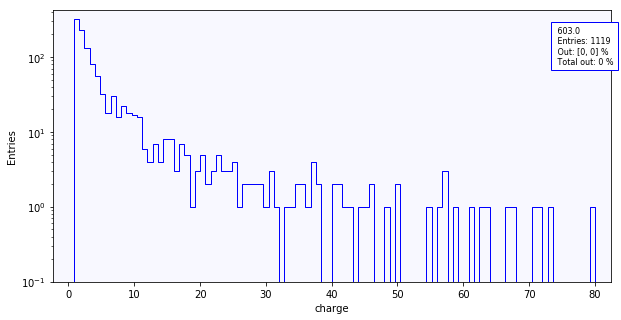

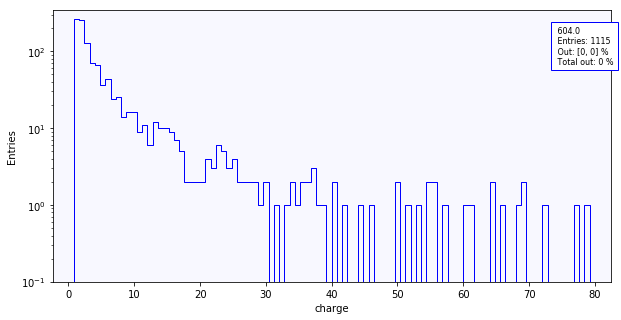

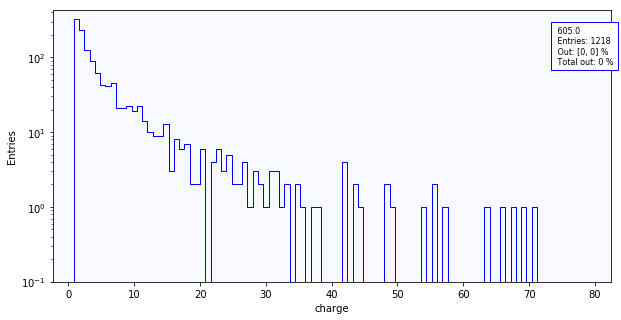

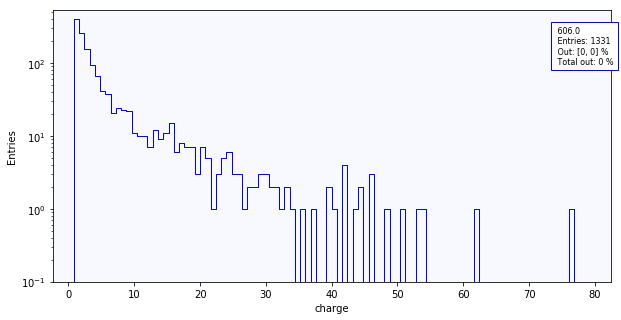

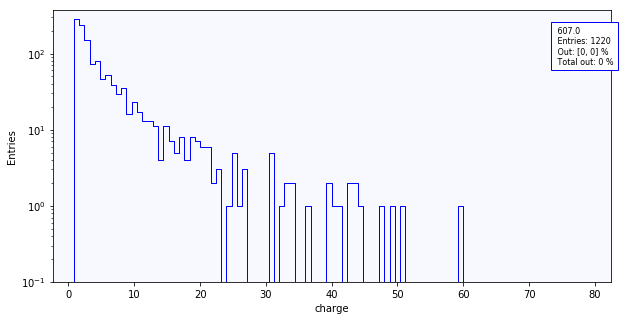

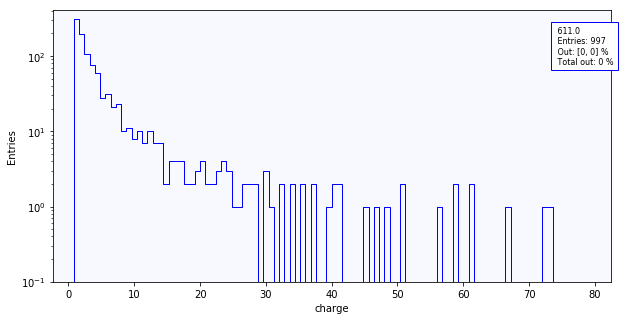

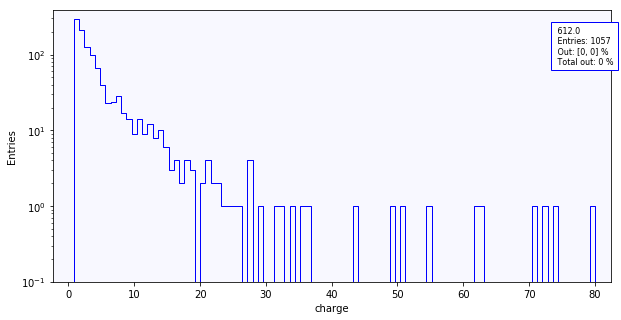

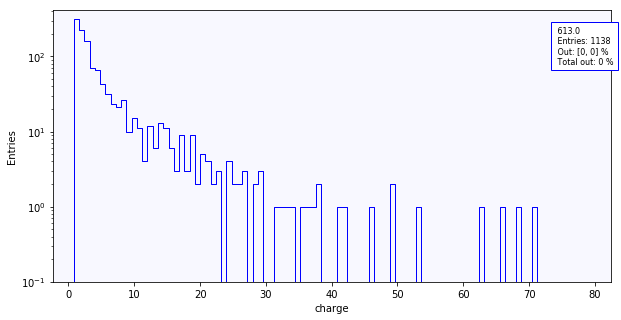

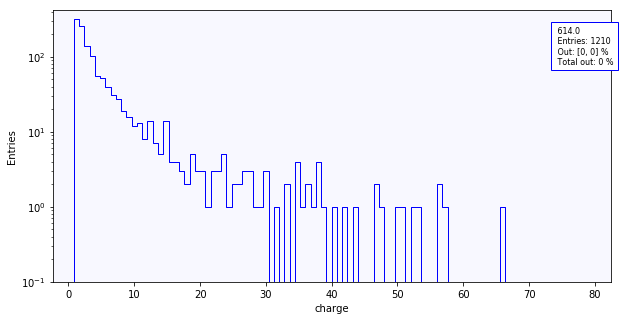

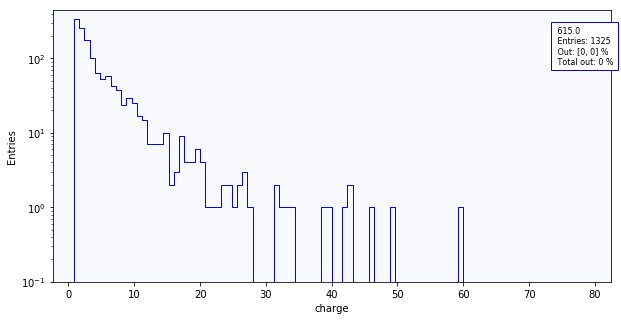

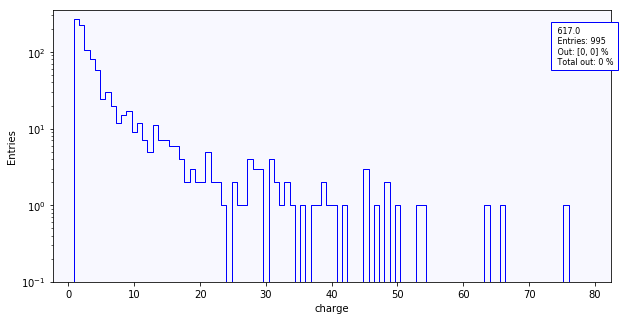

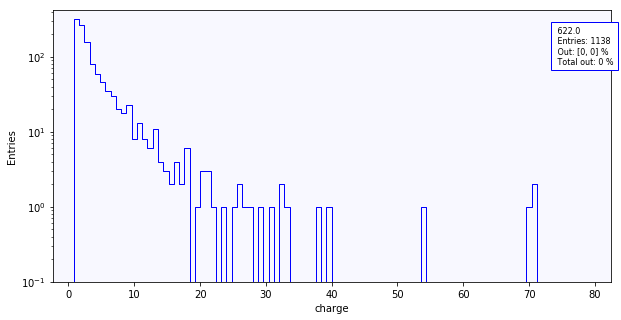

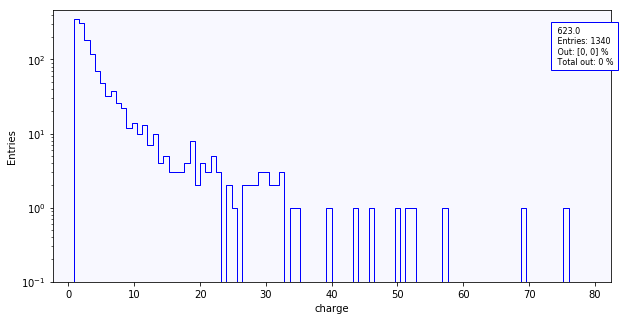

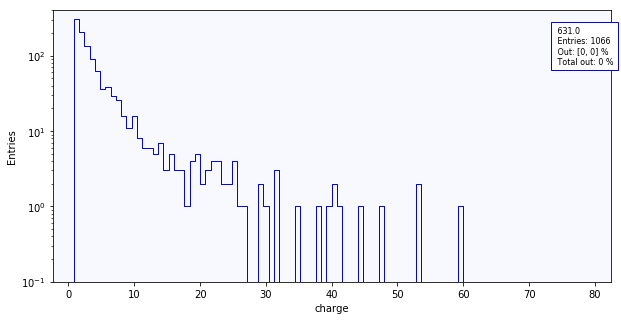

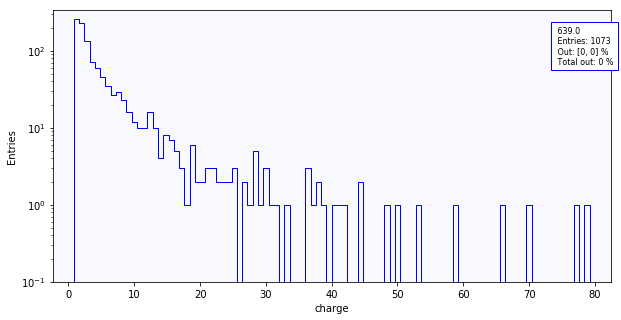

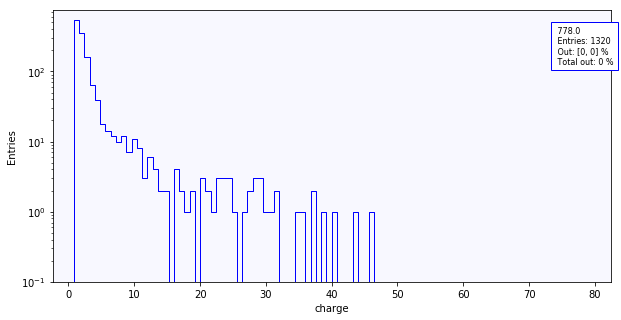

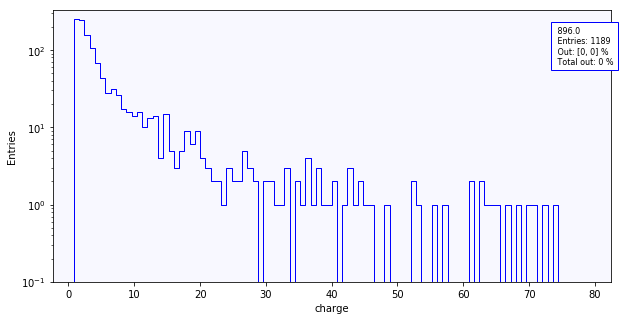

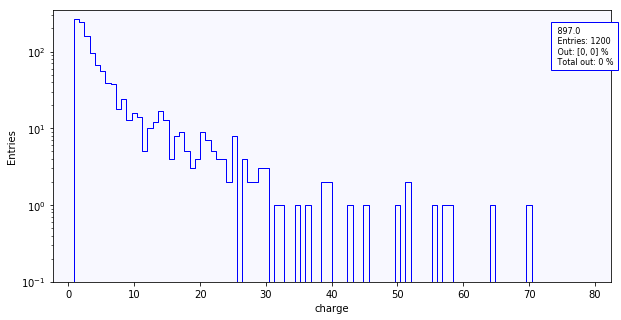

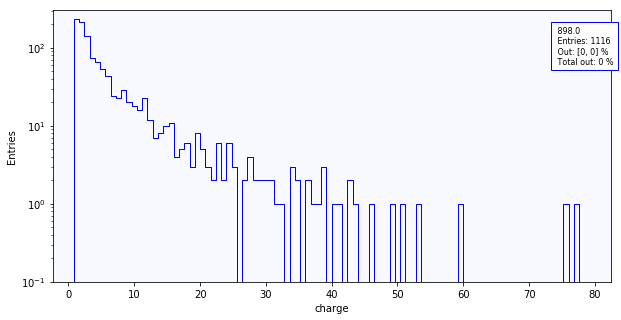

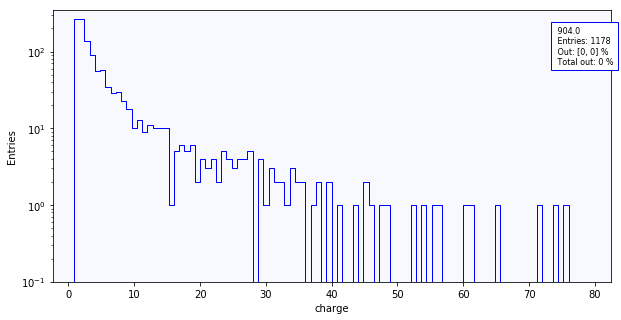

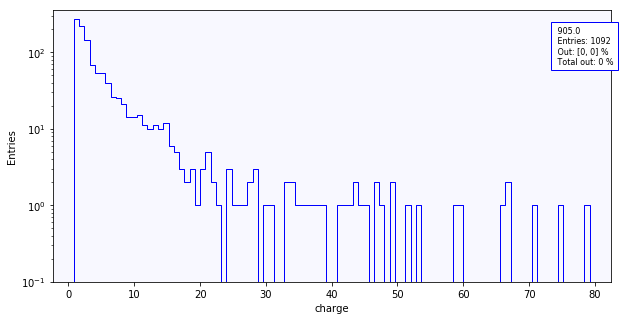

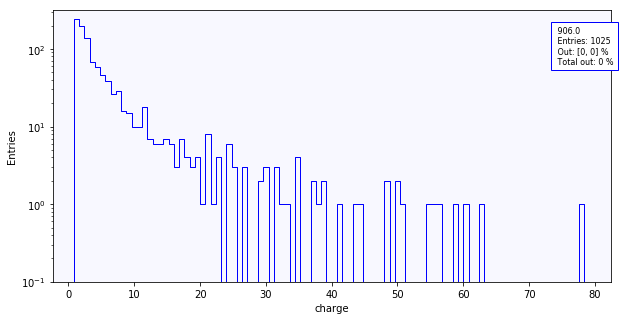

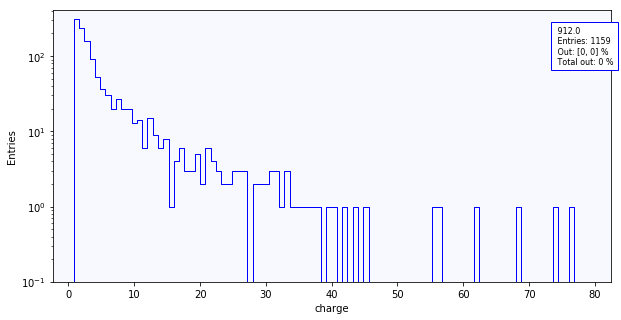

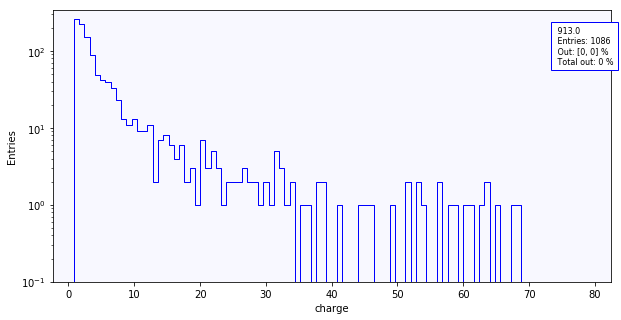

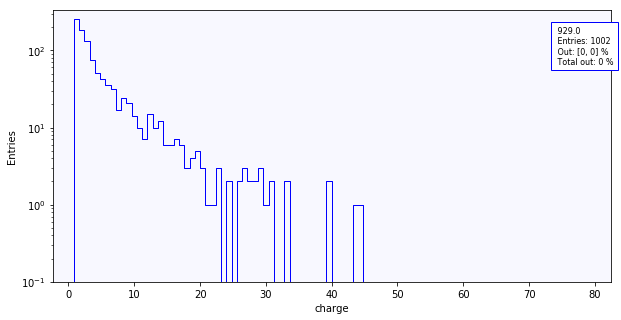

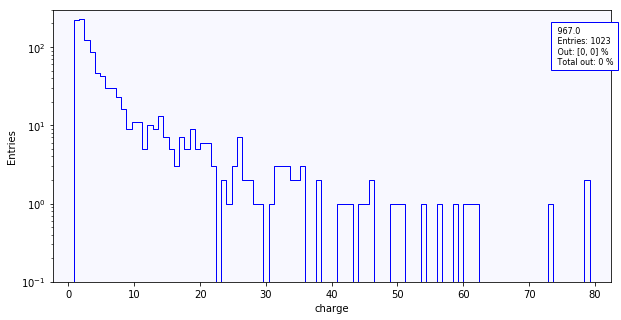

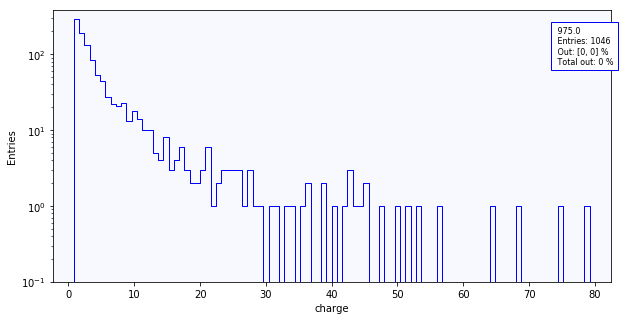

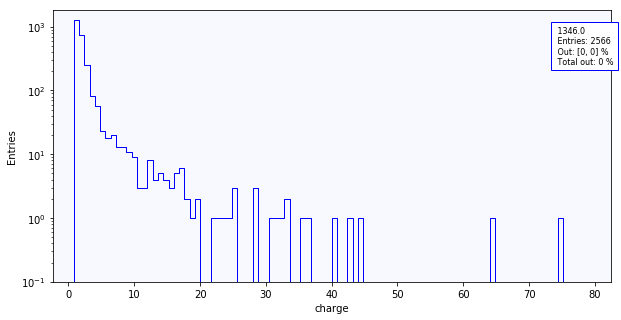

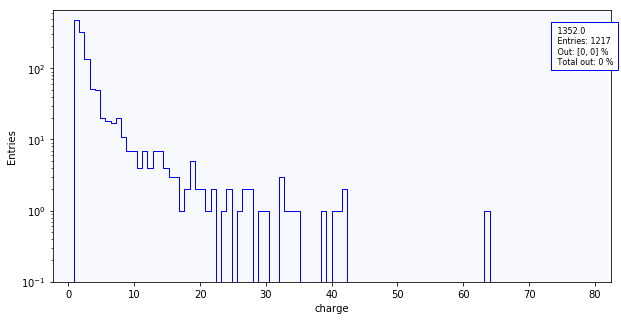

In [52]:
sipms = np.unique(sipm_charge[:, 0])

cut=1e3
for sipm in sipms:
    sel = sipm_charge[:, 0]==sipm
    data = sipm_charge[sel][:, 1]
    
    if len(data)>=cut:
        histo1D(data,
                bins=100,
                xlabel="charge",
                xlims=[0, 80],
                Label0=f"{sipm}",
                scale="log")